# 数据分析
## 载入数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
import lightgbm as lgb
import cufflinks
import pandas_profiling

In [2]:
train = pd.read_csv('./train/train.csv', na_values = -1)
test = pd.read_csv('./test/test.csv', na_values = -1)

train['target'].value_counts()##数据不均衡

0    573518
1     21694
Name: target, dtype: int64

In [3]:
#train.profile_report(style = {'full_width': True})

## 特征分类

In [4]:
train_columns = train.copy()
train_columns.drop('id', axis = 1)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
5,0,5,1.0,4,0.0,0.0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
6,0,2,1.0,3,1.0,0.0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
7,0,5,1.0,4,0.0,0.0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
8,0,5,1.0,3,1.0,0.0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1
9,1,1,1.0,2,0.0,0.0,0,1,0,0,...,3,5,0,6,0,1,0,0,1,0


In [5]:
'''
k = 0
for col in list(train_columns.drop('id', axis = 1).columns):
    k += 1
    plt.subplot(10, 6, k)
    sns.scatterplot(data = train.drop('id'))
'''

"\nk = 0\nfor col in list(train_columns.drop('id', axis = 1).columns):\n    k += 1\n    plt.subplot(10, 6, k)\n    sns.scatterplot(data = train.drop('id'))\n"

In [6]:
values = list(train.columns)[2: ]
cate1 = []
cate2 = []
cate_con_or_ord = []
cat_cols = []
bin_cols = []

for col in train.columns:
    cols = col.split('_')
    if len(cols) == 3:
        cate1.append(cols[1])
        cate2.append('continuous or ordinal')
        cate_con_or_ord.append(col)
    if len(cols) == 4:
        cate1.append(cols[1])
        cate2.append(cols[3])
        if cols[3] == 'cat':
            cat_cols.append(col)
        if cols[3] == 'bin':
            bin_cols.append(col)
columns_df = pd.DataFrame({'category_1': cate1, 'category_2': cate2}, index = values)
columns_df

,category_1,category_2
ps_ind_01,ind,continuous or ordinal
ps_ind_02_cat,ind,cat
ps_ind_03,ind,continuous or ordinal
ps_ind_04_cat,ind,cat
ps_ind_05_cat,ind,cat
ps_ind_06_bin,ind,bin
ps_ind_07_bin,ind,bin
ps_ind_08_bin,ind,bin
ps_ind_09_bin,ind,bin
ps_ind_10_bin,ind,bin


In [7]:
test[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 26 columns):
ps_ind_01     892816 non-null int64
ps_ind_03     892816 non-null int64
ps_ind_14     892816 non-null int64
ps_ind_15     892816 non-null int64
ps_reg_01     892816 non-null float64
ps_reg_02     892816 non-null float64
ps_reg_03     731132 non-null float64
ps_car_11     892815 non-null float64
ps_car_12     892816 non-null float64
ps_car_13     892816 non-null float64
ps_car_14     829011 non-null float64
ps_car_15     892816 non-null float64
ps_calc_01    892816 non-null float64
ps_calc_02    892816 non-null float64
ps_calc_03    892816 non-null float64
ps_calc_04    892816 non-null int64
ps_calc_05    892816 non-null int64
ps_calc_06    892816 non-null int64
ps_calc_07    892816 non-null int64
ps_calc_08    892816 non-null int64
ps_calc_09    892816 non-null int64
ps_calc_10    892816 non-null int64
ps_calc_11    892816 non-null int64
ps_calc_12    892816 non-null int64
ps_

In [8]:
train[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 26 columns):
ps_ind_01     595212 non-null int64
ps_ind_03     595212 non-null int64
ps_ind_14     595212 non-null int64
ps_ind_15     595212 non-null int64
ps_reg_01     595212 non-null float64
ps_reg_02     595212 non-null float64
ps_reg_03     487440 non-null float64
ps_car_11     595207 non-null float64
ps_car_12     595211 non-null float64
ps_car_13     595212 non-null float64
ps_car_14     552592 non-null float64
ps_car_15     595212 non-null float64
ps_calc_01    595212 non-null float64
ps_calc_02    595212 non-null float64
ps_calc_03    595212 non-null float64
ps_calc_04    595212 non-null int64
ps_calc_05    595212 non-null int64
ps_calc_06    595212 non-null int64
ps_calc_07    595212 non-null int64
ps_calc_08    595212 non-null int64
ps_calc_09    595212 non-null int64
ps_calc_10    595212 non-null int64
ps_calc_11    595212 non-null int64
ps_calc_12    595212 non-null int64
ps_

## 处理空值数据

('ps_car_03_cat', 411231)
('ps_car_05_cat', 266551)
('ps_reg_03', 107772)
('ps_car_14', 42620)
('ps_car_07_cat', 11489)
('ps_ind_05_cat', 5809)
('ps_car_09_cat', 569)
('ps_ind_02_cat', 216)
('ps_car_01_cat', 107)
('ps_ind_04_cat', 83)
('ps_car_02_cat', 5)
('ps_car_11', 5)
('ps_car_12', 1)


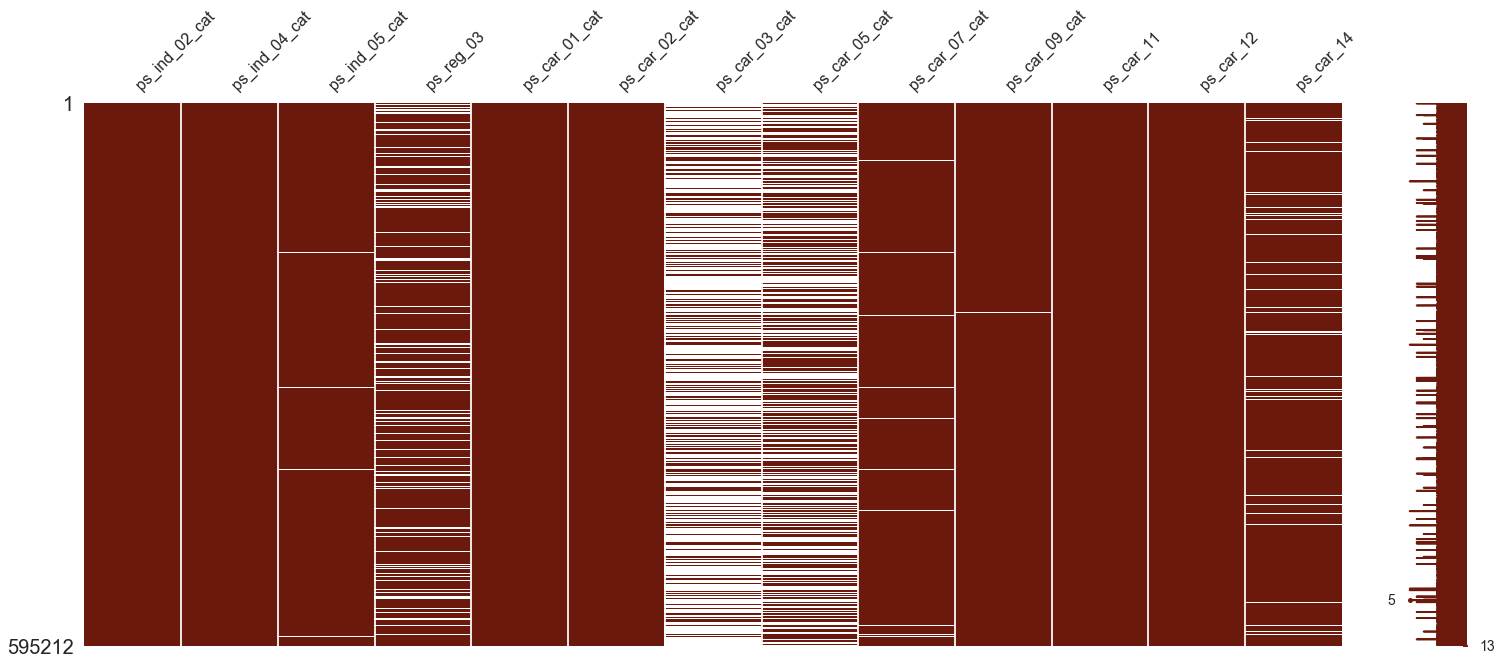

In [9]:
import missingno as msno

train_null_values = []
train_col_missing = []

for col in values:
    if len(train[col][train[col].isnull()].index):
        train_null_values.append((col, len(train[col][train[col].isnull()].index)))
        train_col_missing.append(col)
for i in sorted(train_null_values, key = lambda x: x[1], reverse = True):
    print(i)
msno.matrix(train[train_col_missing], color=(0.42, 0.1, 0.05))

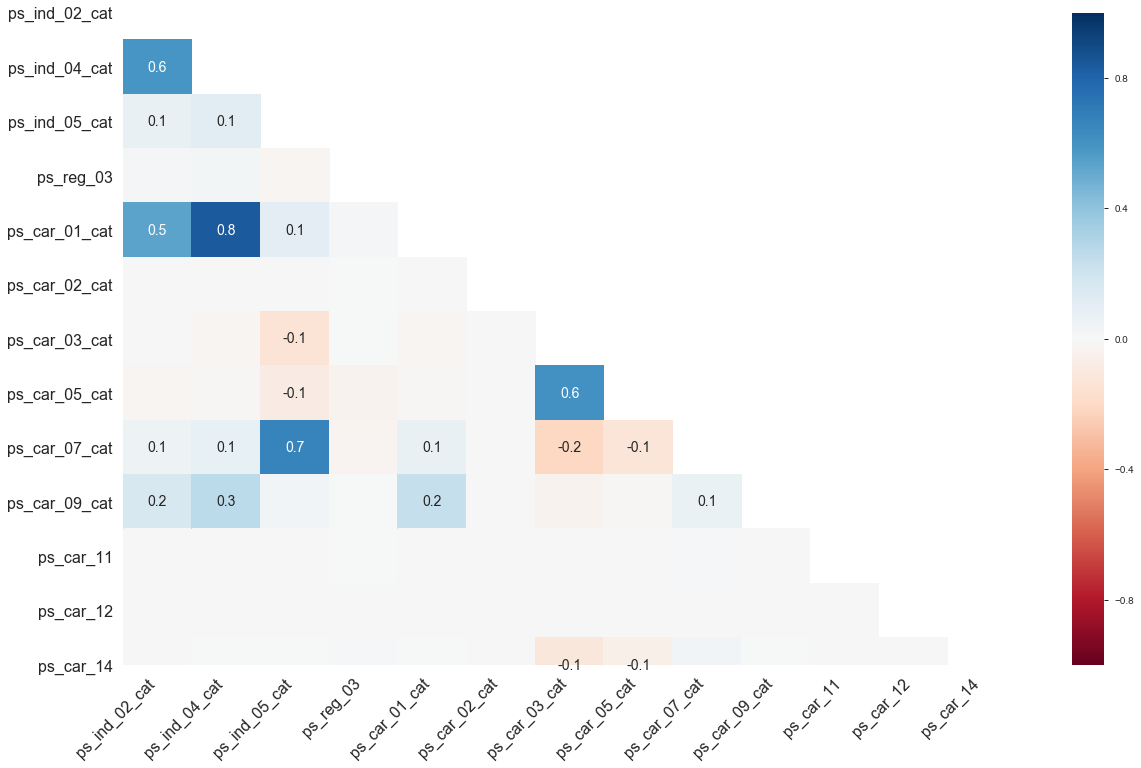

In [10]:
msno.heatmap(df = train[train_col_missing])

('ps_car_03_cat', 616911)
('ps_car_05_cat', 400359)
('ps_reg_03', 161684)
('ps_car_14', 63805)
('ps_car_07_cat', 17331)
('ps_ind_05_cat', 8710)
('ps_car_09_cat', 877)
('ps_ind_02_cat', 307)
('ps_car_01_cat', 160)
('ps_ind_04_cat', 145)
('ps_car_02_cat', 5)
('ps_car_11', 1)


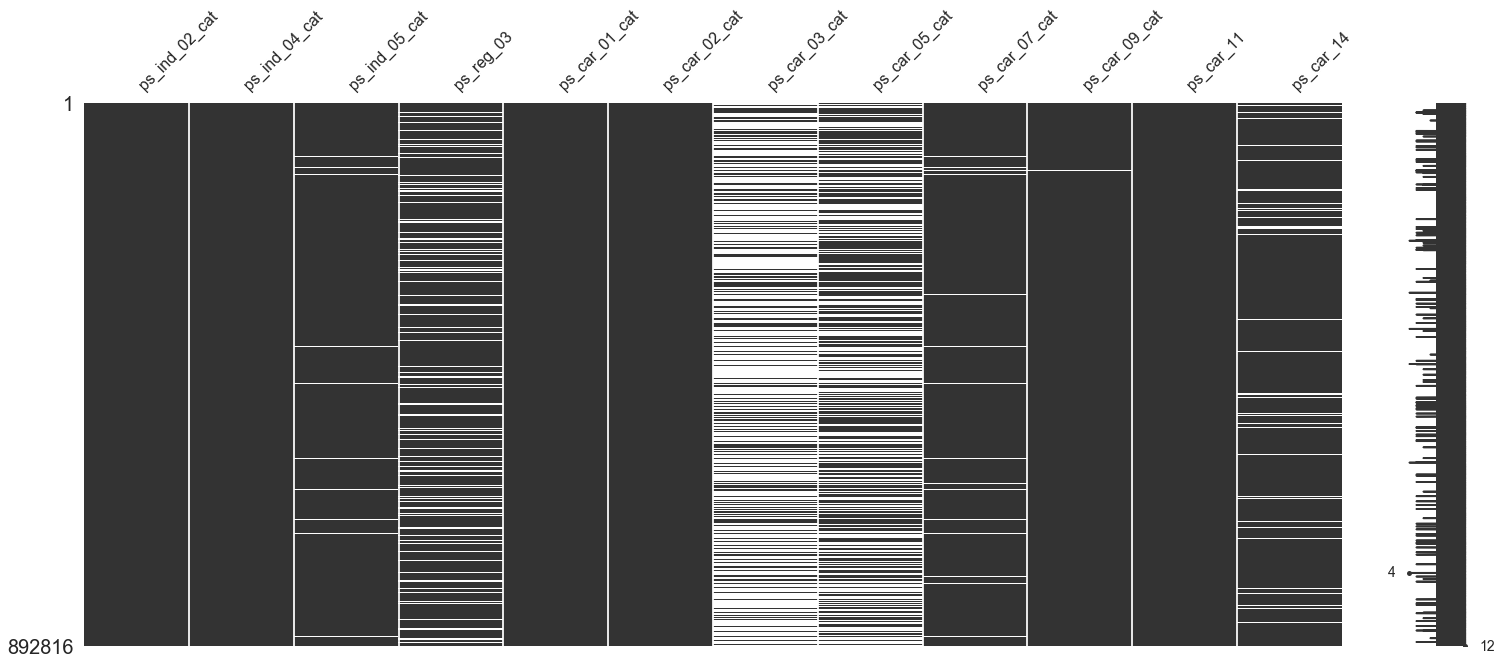

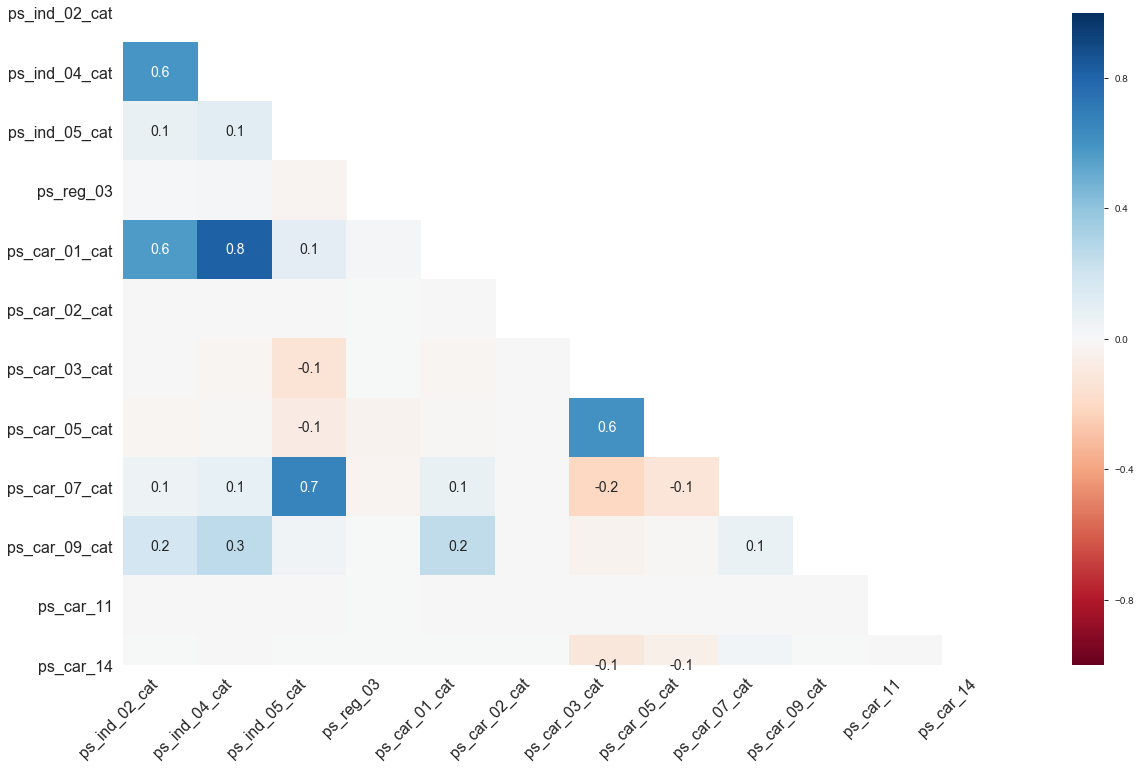

In [11]:
import missingno as msno

test_col_missing = []
test_null_values = []
for col in values:
    if len(test[col][test[col].isnull()].index):
        test_col_missing.append(col)
        test_null_values.append((col, len(test[col][test[col].isnull()].index)))
for i in sorted(test_null_values, key = lambda x: x[1], reverse = True):
    print(i)
    
msno.matrix(test[test_col_missing], color = (0.2, 0.2, 0.2))
msno.heatmap(test[test_col_missing])

## 相关性分析

In [12]:
help(train[values].corr().iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Retur

In [13]:
'''
import plotly.figure_factory as ff
corr = train[values].corr().round(2)
ff.create_annotated_heatmap(z = corr.values, x = list(corr.columns), y = list(corr.index), 
                            annotation_text = corr.round(2).values, showscale = True).show()
'''

'\nimport plotly.figure_factory as ff\ncorr = train[values].corr().round(2)\nff.create_annotated_heatmap(z = corr.values, x = list(corr.columns), y = list(corr.index), \n                            annotation_text = corr.round(2).values, showscale = True).show()\n'

In [14]:
import cufflinks as cf
train[values].corr().iplot(kind = 'heatmap', text = train[values].corr().values)

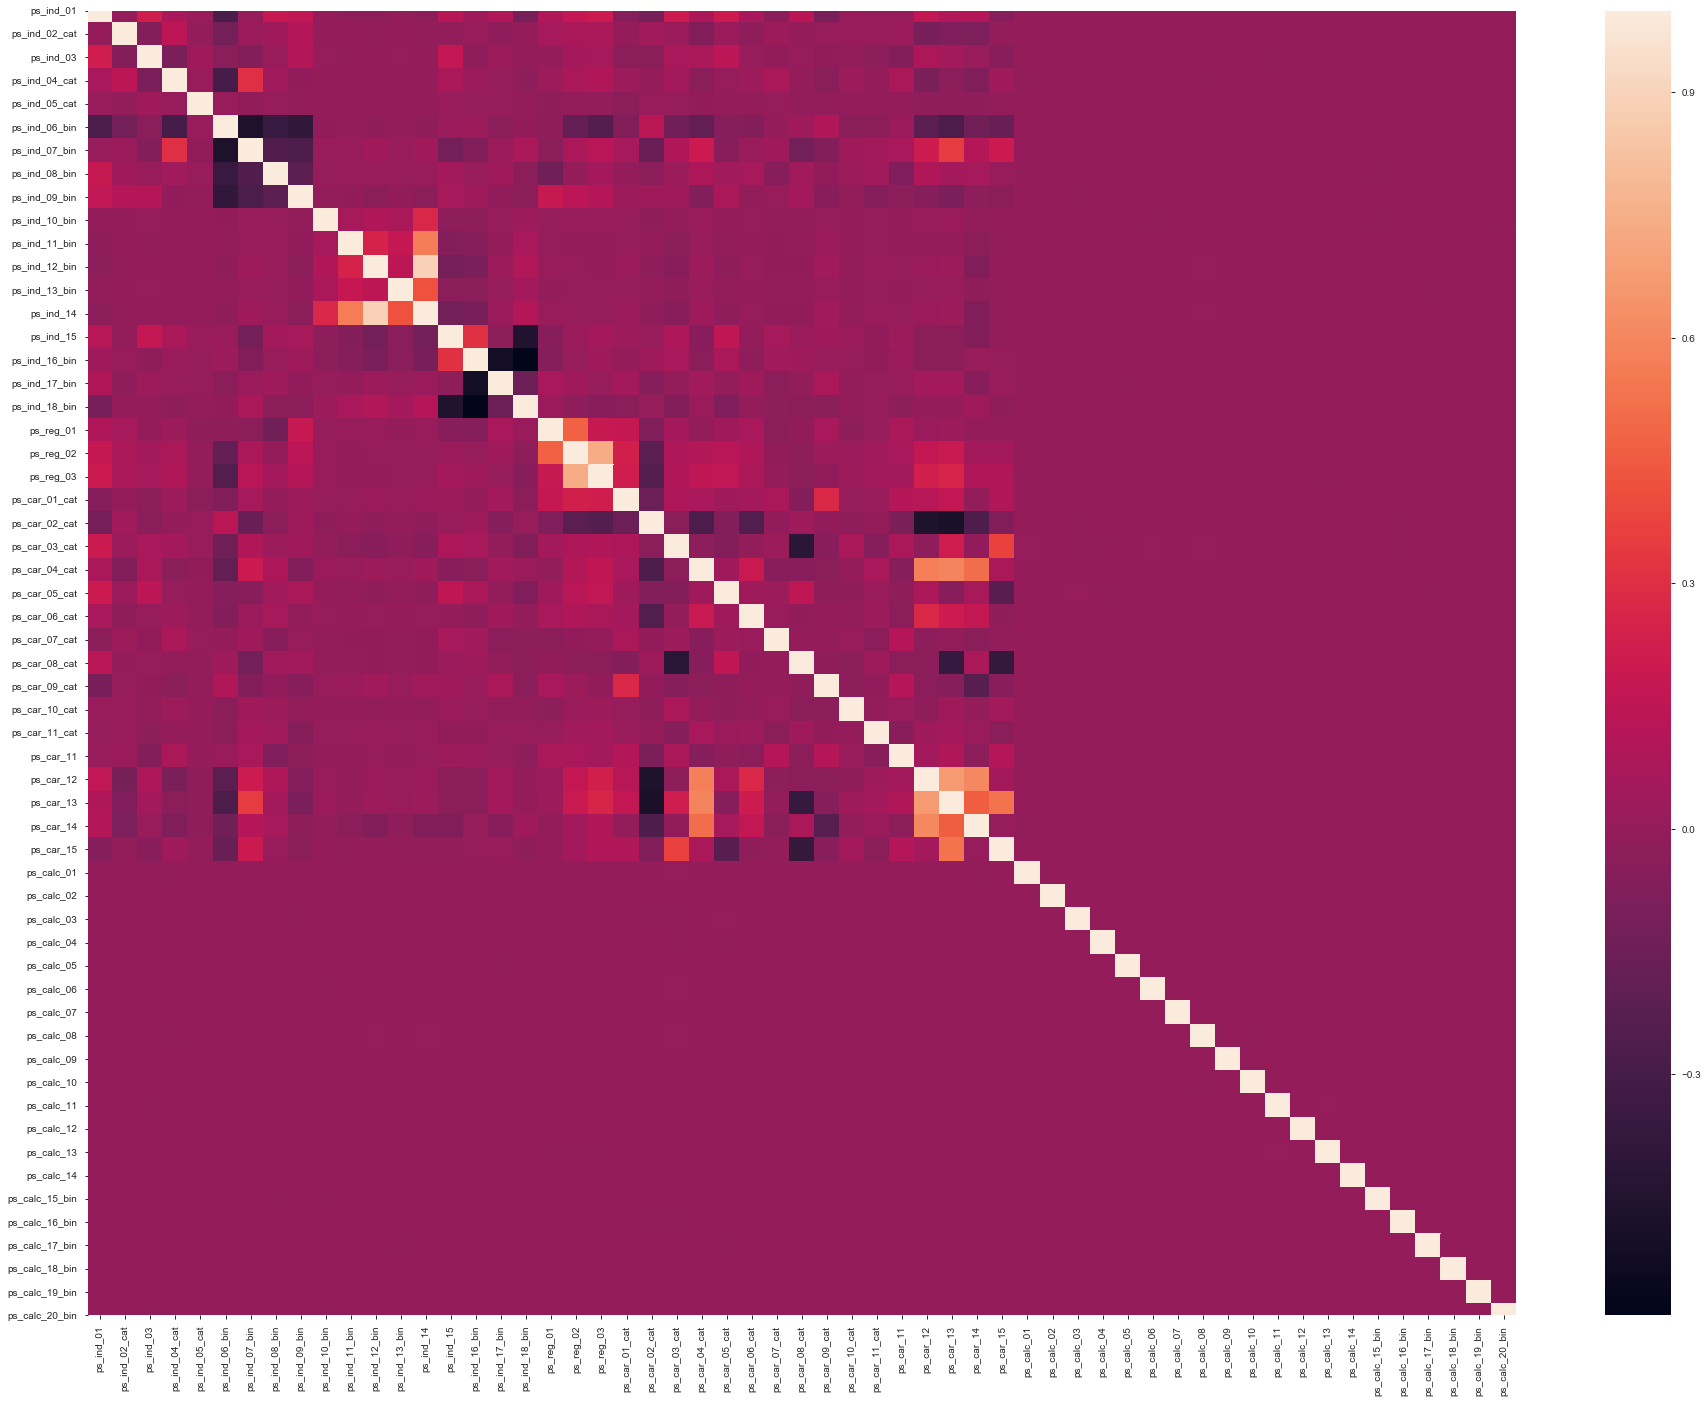

In [15]:
import seaborn as sns
plt.figure(figsize = (32, 24))
sns.heatmap(train[values].corr())##calc数据没有相关性

In [16]:
corr_values = values.copy()
for col in values:
    if 'calc' in col:
        corr_values.remove(col)
train[corr_values].corr().iplot(kind = 'heatmap', colorscale = 'spectral')

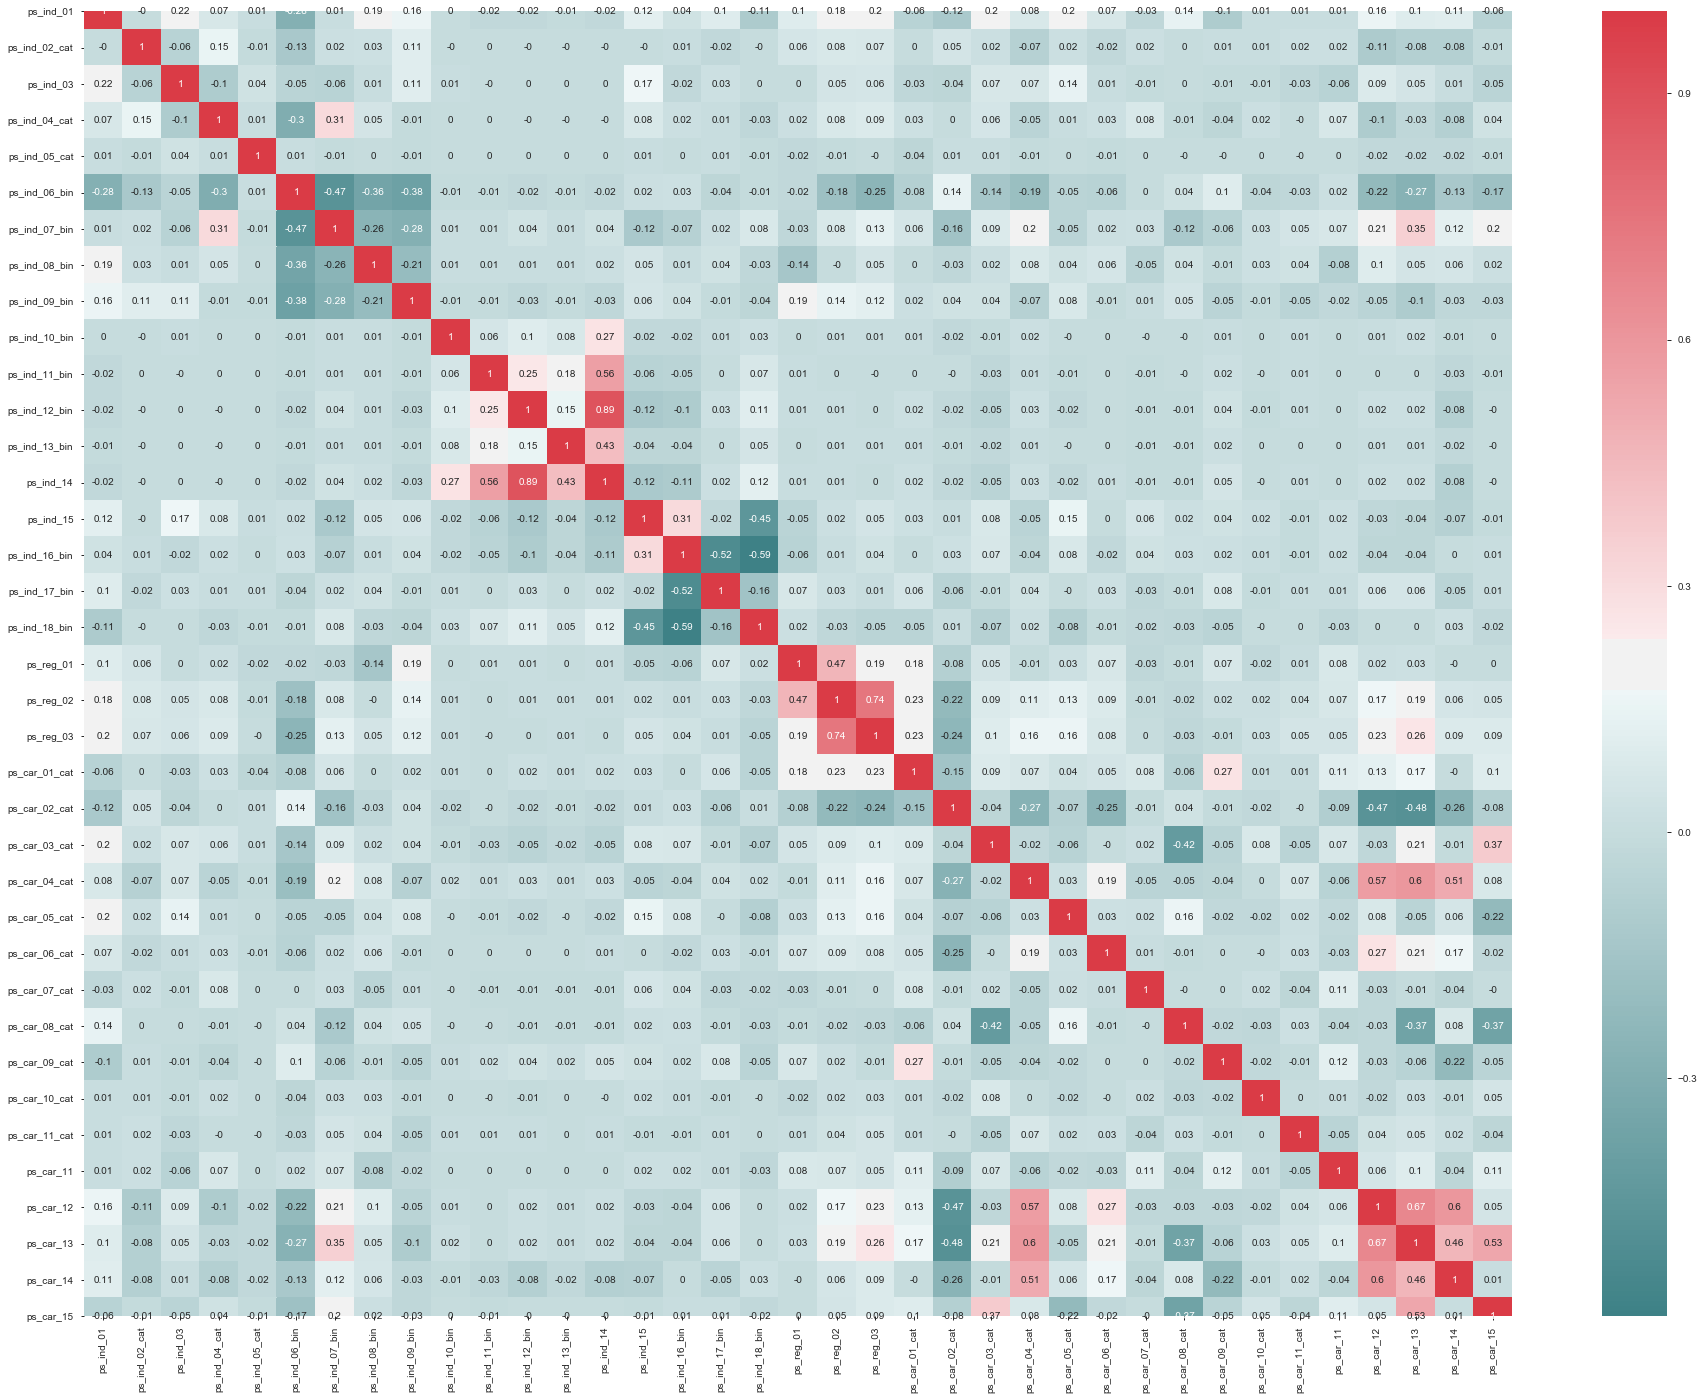

In [17]:
corr_values = values.copy()
for col in values:
    if 'calc' in col:
        corr_values.remove(col)
plt.figure(figsize = (32, 24))
sns.heatmap(train[corr_values].corr().round(2), annot = True, 
            cmap = sns.diverging_palette(200, 10, as_cmap=True))

## 各类特征分析
### 二分类特征分析
#### 训练集二分类空值占比

In [18]:
import cufflinks as cf

train_bin_zero_list = []
train_bin_one_list = []
for col in bin_cols:
    temp = train[col].value_counts()
    zero = temp[0]
    one = temp[1]
    train_bin_zero_list.append(zero)
    train_bin_one_list.append(one)
    
df = pd.DataFrame({'zero_counts': train_bin_zero_list, 'one_counts': train_bin_one_list}, index = bin_cols)
df.iplot(kind = 'bar', barmode = 'stack')

In [19]:
import plotly.offline as pltoff
import plotly.graph_objs as go

train_bin_zero_list = []
train_bin_one_list = []
for col in bin_cols:
    temp = train[col].value_counts()
    zero = temp[0]
    one = temp[1]
    train_bin_zero_list.append(zero)
    train_bin_one_list.append(one)

train_trace1 = go.Bar(x = bin_cols,
               y = train_bin_zero_list,
               name = 'zero_counts')
train_trace2 = go.Bar(x = bin_cols,
               y = train_bin_one_list,
               name = 'one_counts')
train_bin_plot_data = [train_trace1, train_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(layout = layout, data = train_bin_plot_data)
pltoff.iplot(fig, filename = 'stack-bar')
##ps_ind_14与ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin相关，
#而这4项二分类取零较多，ps_ind_14空值较多

#### 测试集空值占比

In [20]:
import cufflinks as cf

test_bin_zero_list = []
test_bin_one_list = []

for col in bin_cols:
    temp = test[col].value_counts()
    test_bin_zero_list.append(temp[0])
    test_bin_one_list.append(temp[1])

pd.DataFrame({'zero_counts': test_bin_zero_list, 'one_counts': test_bin_one_list}, index = bin_cols).iplot(kind = 'bar', barmode = 'stack')

In [21]:
import plotly.offline as pltoff
import plotly.graph_objs as go

test_bin_zero_list = []
test_bin_one_list = []

for col in bin_cols:
    temp = test[col].value_counts()
    test_bin_zero_list.append(temp[0])
    test_bin_one_list.append(temp[1])

test_trace1 = go.Bar(x = bin_cols,
                    y = test_bin_zero_list,
                    name = 'zero counts')
test_trace2 = go.Bar(x = bin_cols,
                    y = test_bin_one_list,
                    name = 'one counts')
test_bin_plot_data = [test_trace1, test_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(data = test_bin_plot_data, layout = layout)
pltoff.iplot(fig, filename = 'stack-bar')

#### 训练集各特征相应的target取值占比

In [22]:
train_1 = train[train.target == 1]
train_0 = train[train.target == 0]

k = 0
#plt.figure(figsize = (32, 24))
for col in bin_cols:
    temp0 = train_0[col].value_counts()
    bin_zero_t0 = temp0[0]
    bin_one_t0 = temp0[1]
    temp1 = train_1[col].value_counts()
    bin_zero_t1 = temp1[0]
    bin_one_t1 = temp1[1]
    one_list = (bin_zero_t1 / (bin_zero_t0 + bin_zero_t1), bin_one_t1 / (bin_one_t0 + bin_one_t1))
    if k == 0:
        df = pd.DataFrame({col: one_list}, index = ['feature: 0', 'feature: 1'])
    if k != 0:
        df = pd.concat([df, pd.DataFrame({col: one_list}, index = ['feature: 0', 'feature: 1'])], 
                       axis = 1, sort = False).round(2)
    k += 1

In [23]:
df.iplot(kind = 'bar', subplots = True, shape = (5, 4))

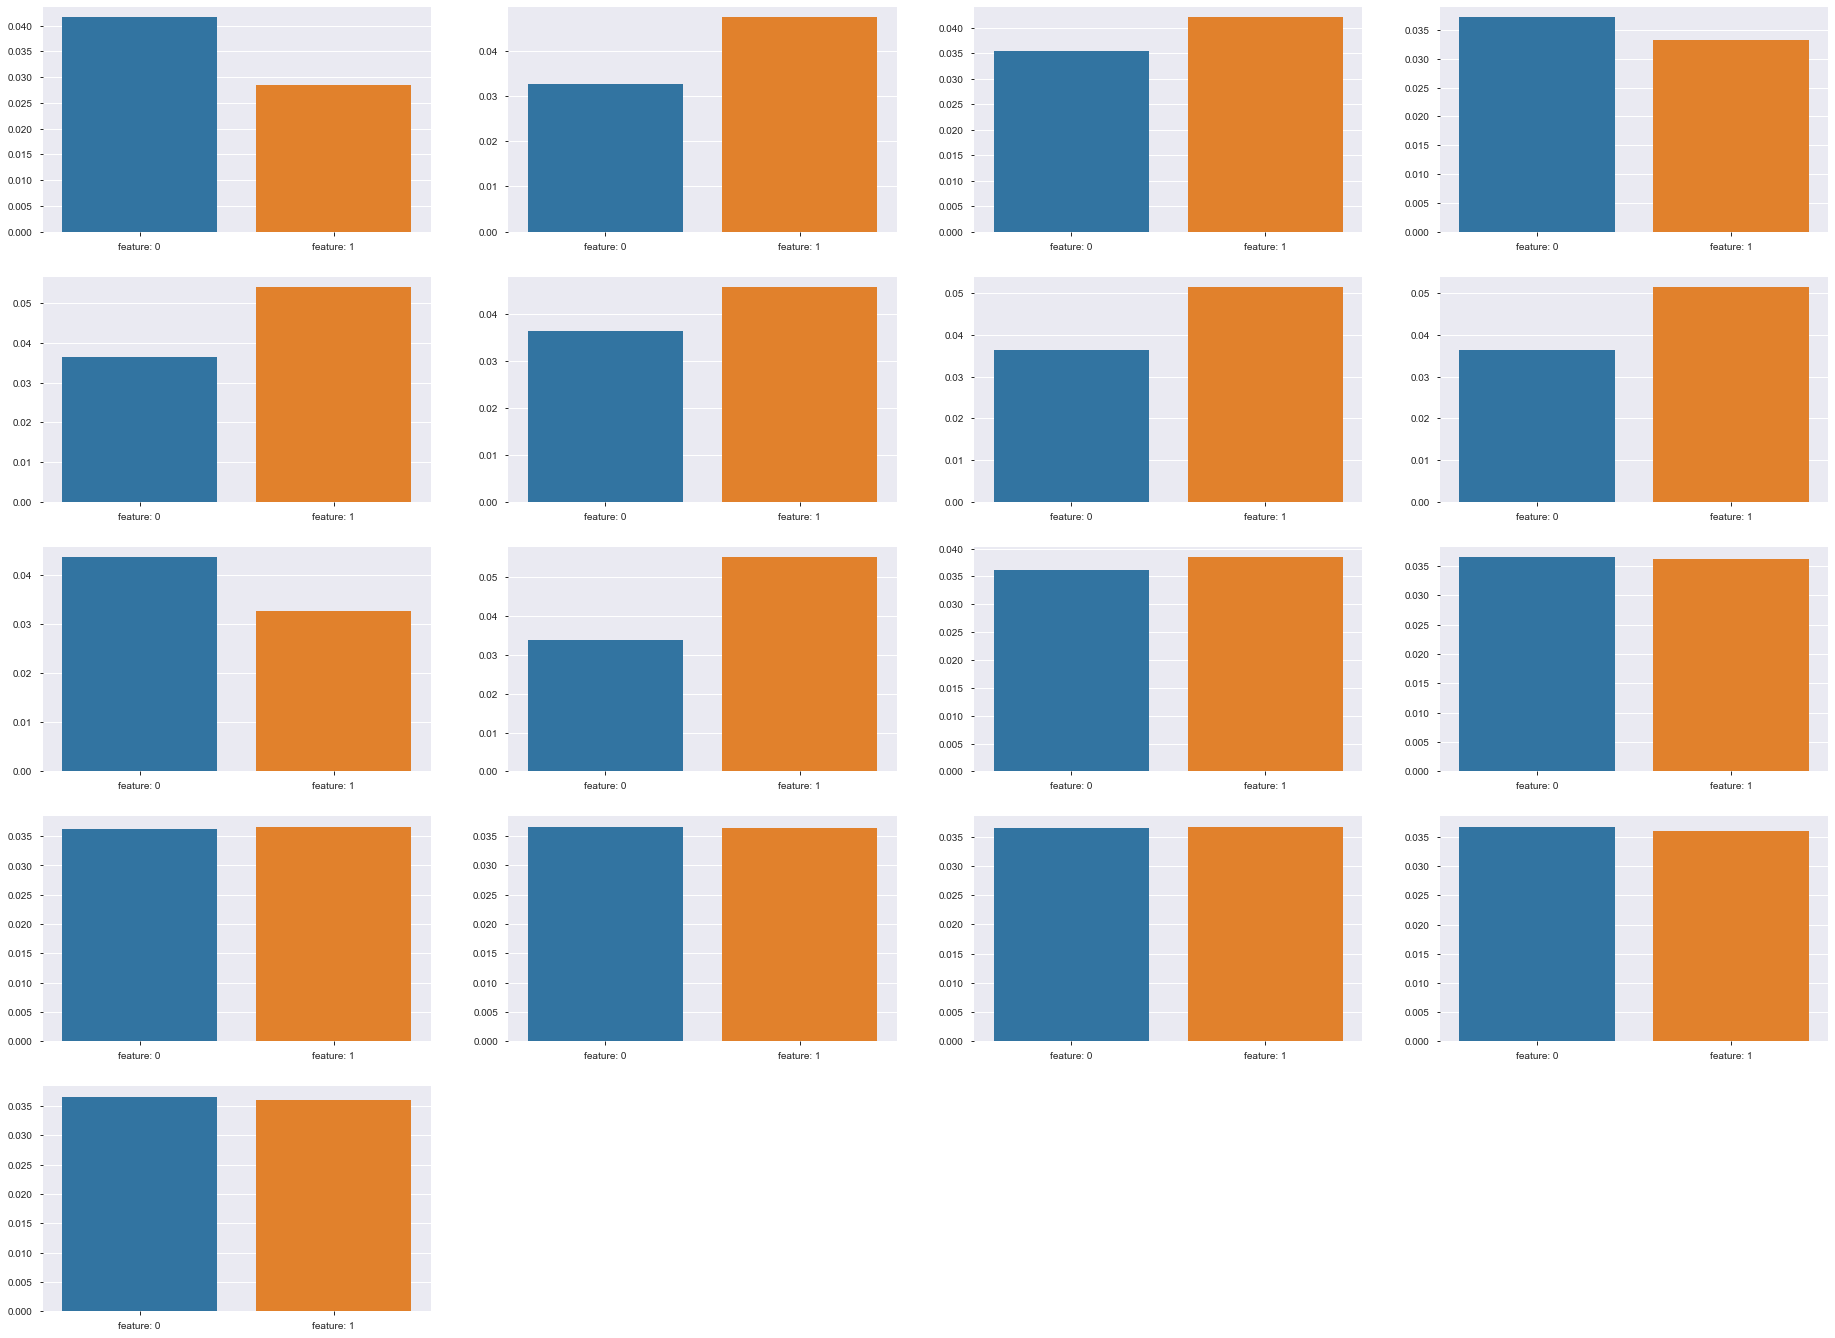

In [24]:
import seaborn as sns

train_1 = train[train.target == 1]
train_0 = train[train.target == 0]

k = 0
plt.figure(figsize = (32, 24))
for col in bin_cols:
    k += 1
    temp0 = train_0[col].value_counts()
    bin_zero_t0 = temp0[0]
    bin_one_t0 = temp0[1]
    temp1 = train_1[col].value_counts()
    bin_zero_t1 = temp1[0]
    bin_one_t1 = temp1[1]
    one_list = (bin_zero_t1 / (bin_zero_t0 + bin_zero_t1), bin_one_t1 / (bin_one_t0 + bin_one_t1))
    df = pd.DataFrame({'portion of target1': one_list}, index = ['feature: 0', 'feature: 1']).transpose()
    plt.subplot(5, 4, k) 
    sns.barplot(data = df)

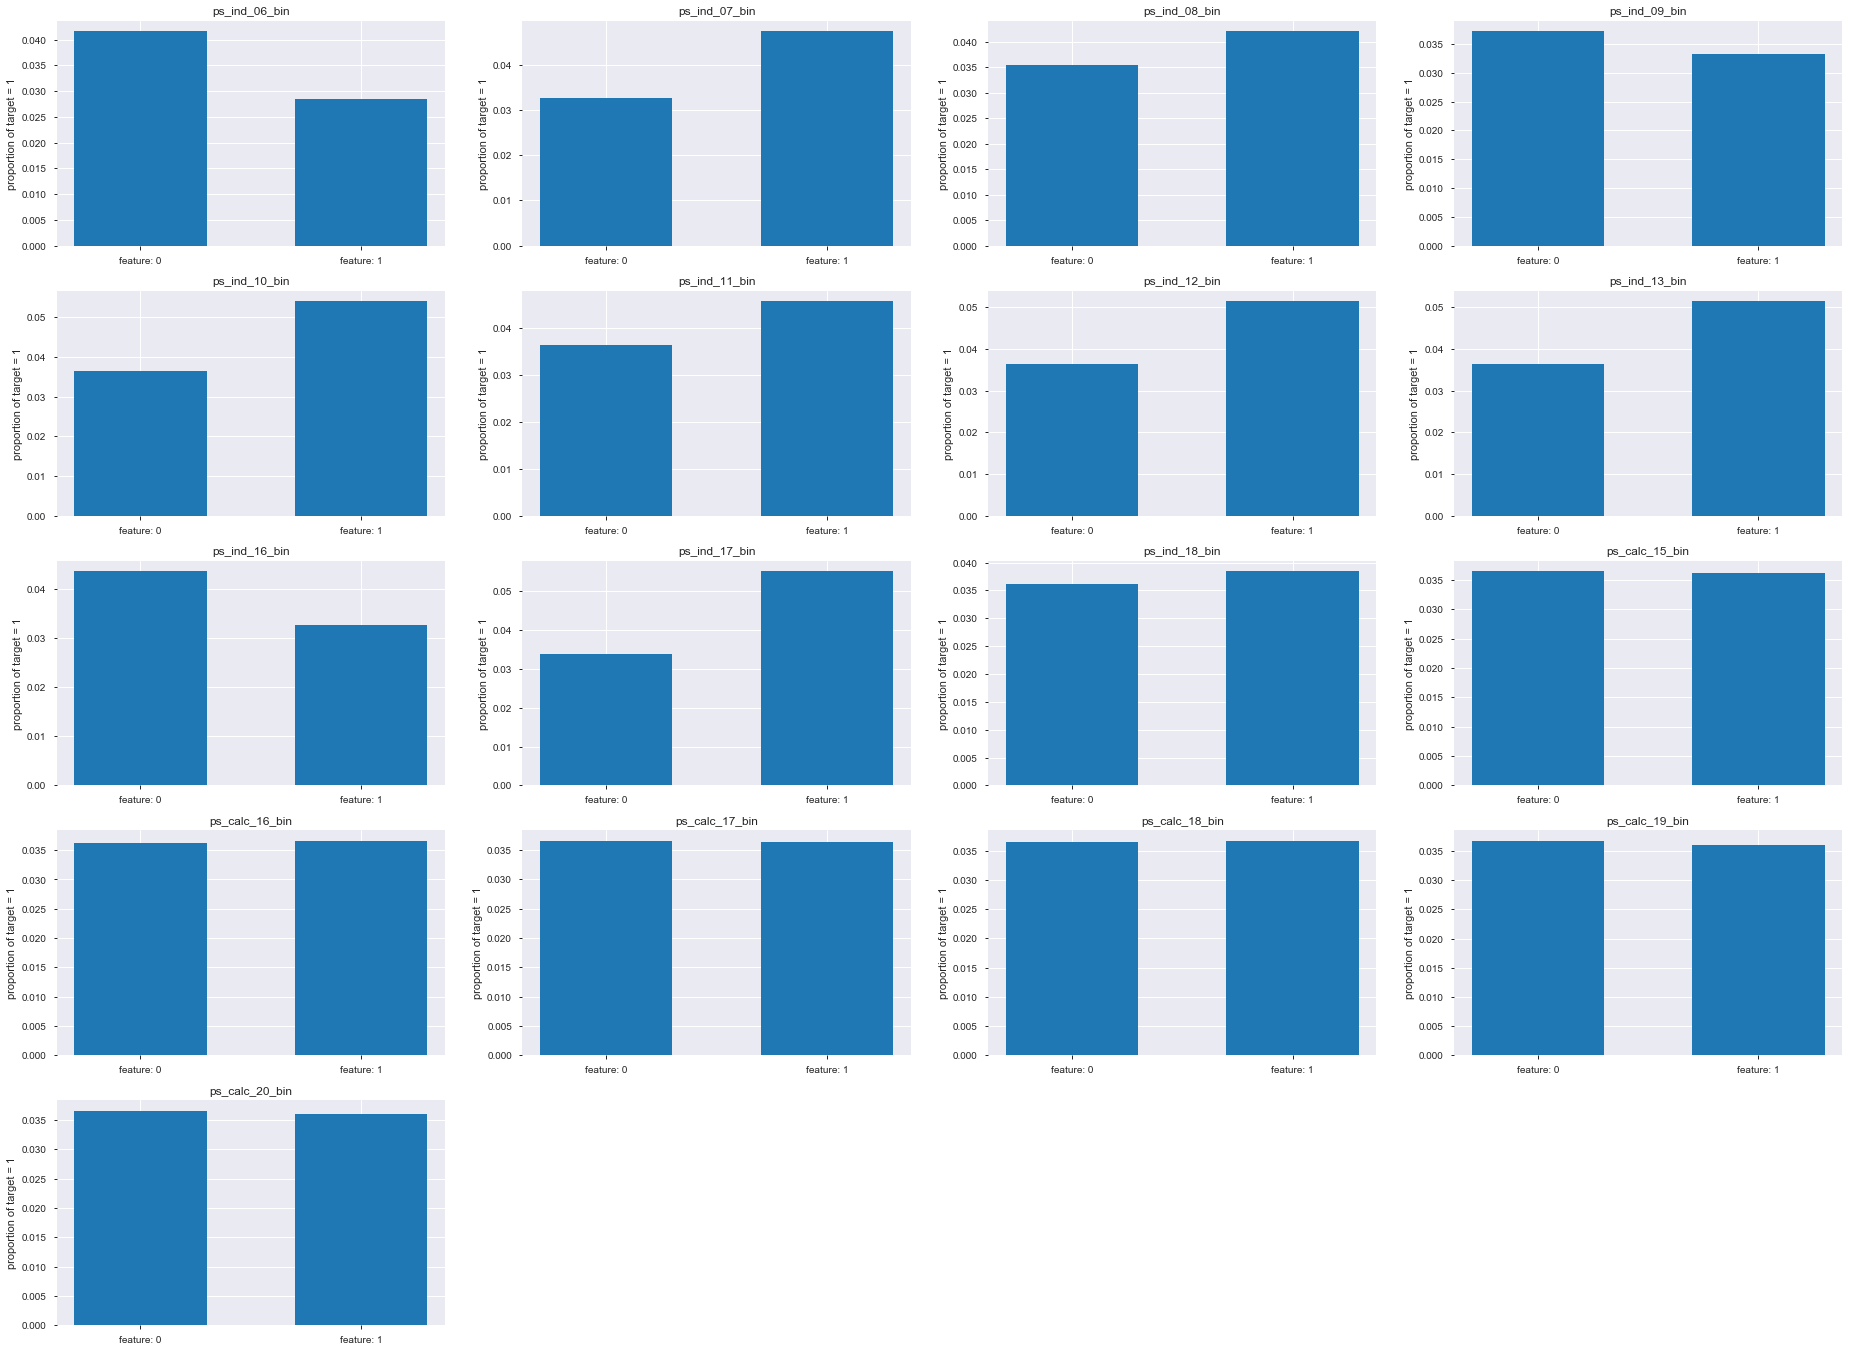

In [25]:
train_1 = train[train.target == 1]
train_0 = train[train.target == 0]

k = 0
plt.figure(figsize = (32,24))
for col in bin_cols:
    k += 1
    temp0 = train_0[col].value_counts()
    bin_zero_t0 = temp0[0]
    bin_one_t0 = temp0[1]
    temp1 = train_1[col].value_counts()
    bin_zero_t1 = temp1[0]
    bin_one_t1 = temp1[1]
    one_list = (bin_zero_t1 / (bin_zero_t0 + bin_zero_t1), bin_one_t1 / (bin_one_t0 + bin_one_t1))
    plt.subplot(5, 4, k) 
    plt.ylabel('proportion of target = 1')
    plt.title(col)
    plt.bar(('feature: 0', 'feature: 1'), one_list, width = 0.6, label = 'target: 1')

### 多分类特征分析

#### 特征对target的影响

In [ ]:
'''
train_cate = train.fillna(-1).copy()

k = 0
for col in cat_cols:
    names = []
    cate_t0 = []
    cate_t1 = []
    one_list = []
    for i in train_cate[col].unique():
        names.append(str(i))
        target = train_cate.loc[train_cate[col] == i, ['target']]
        if len(target['target'].unique()) == 2:
            cate_t0.append(target['target'].value_counts(sort = False)[0])
            cate_t1.append(target['target'].value_counts(sort = False)[1])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 1: 
            cate_t0.append(0)
            cate_t1.append(target['target'].value_counts()[0])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 0:
            cate_t0.append(target['target'].value_counts()[0])
            cate_t1.append(0)
        
    for i in zip(cate_t0, cate_t1):
        one_list.append(i[1] / (i[0] + i[1]))
    if k == 0:
        df = pd.DataFrame(one_list, index = names)
    if k != 0:
        df = pd.concat(df, pd.DataFrame(one_list, index = names), axis = 0)
    k += 1
'''

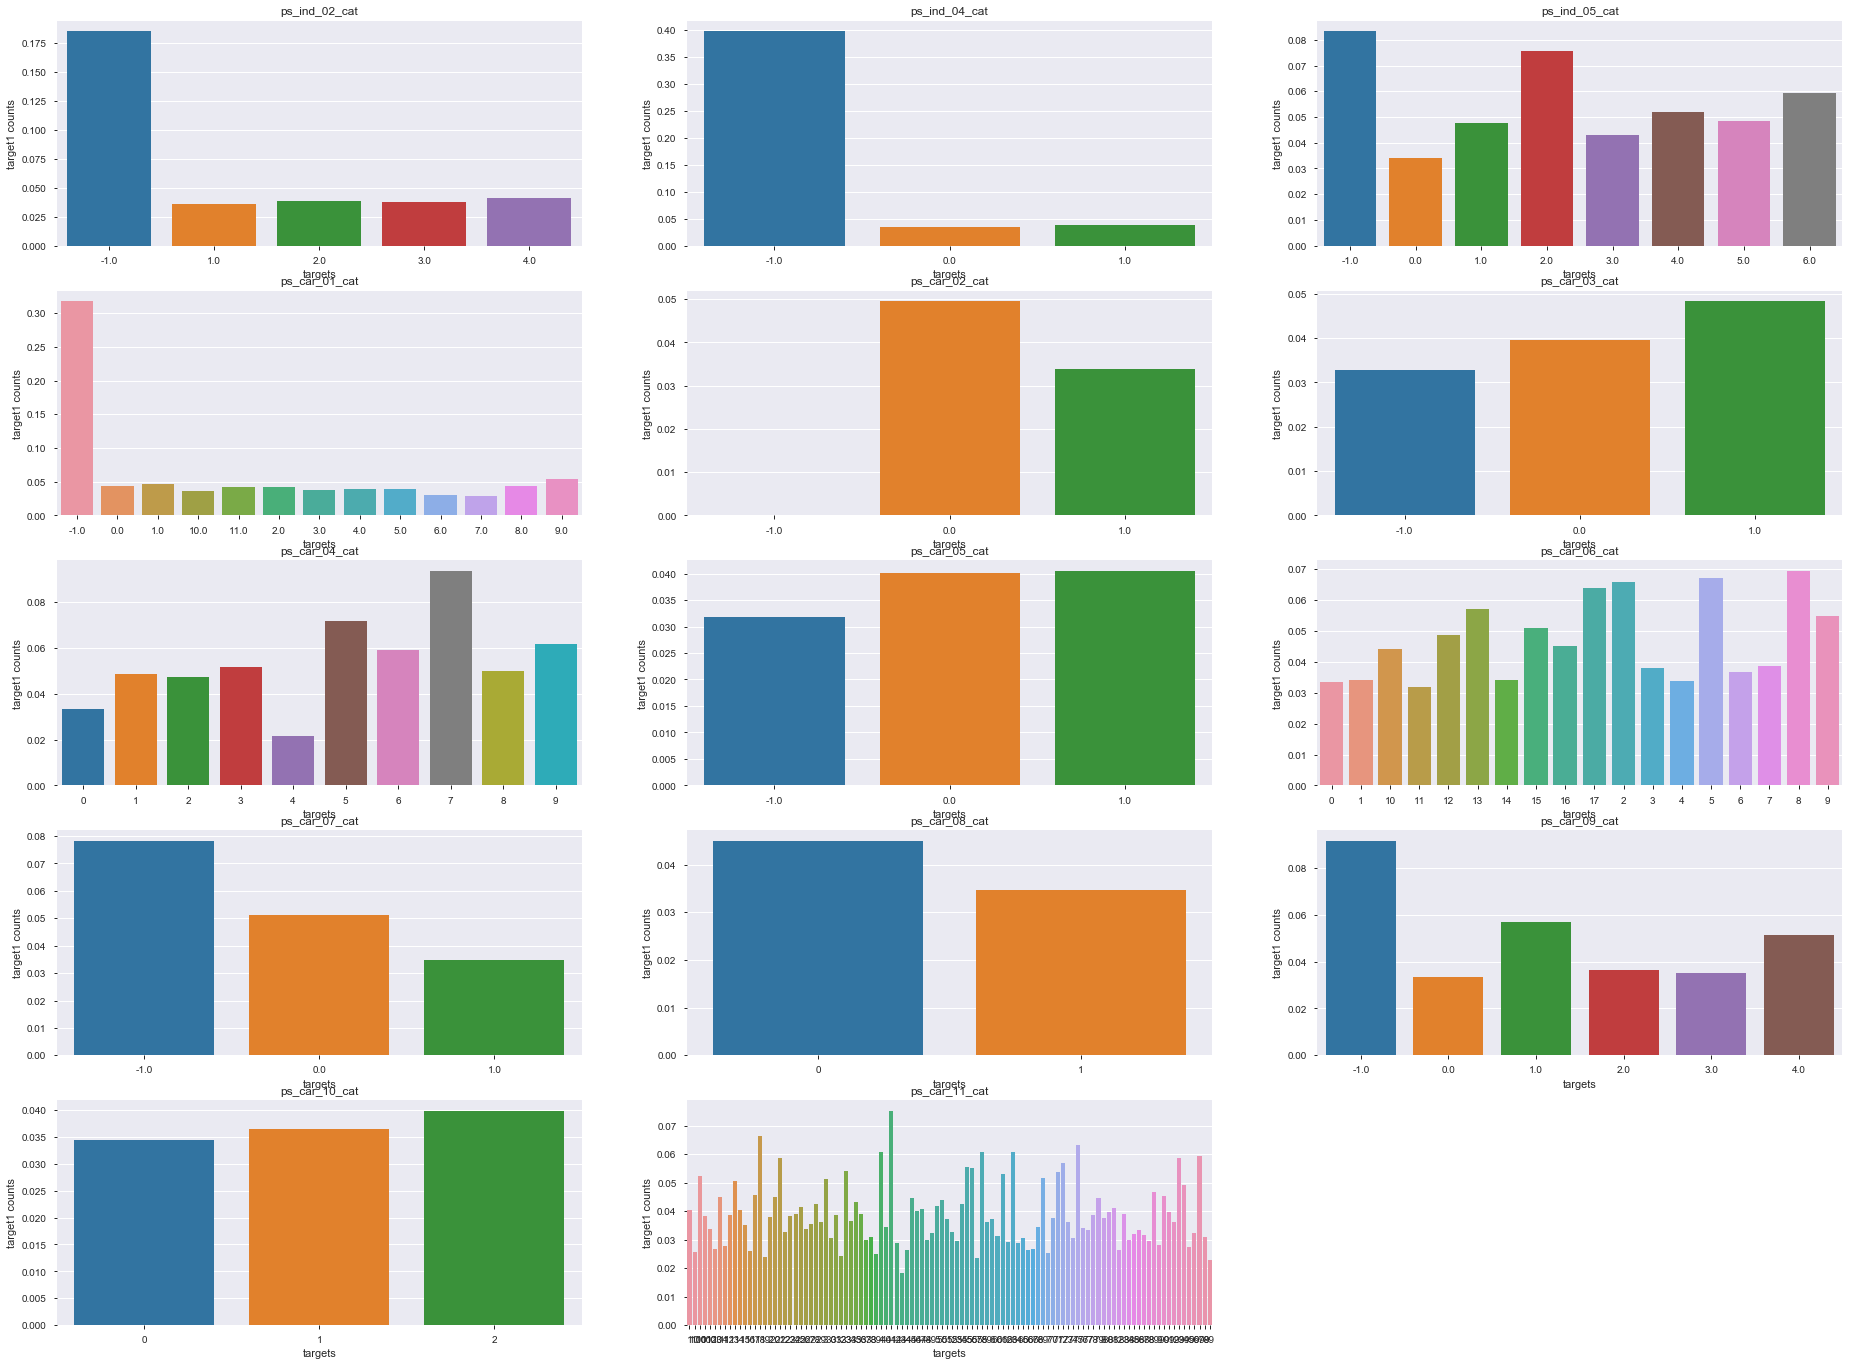

In [31]:
train_cate = train.fillna(-1).copy()
plt.figure(figsize = (32, 24))
k = 0
for col in cat_cols:
    k += 1
    names = []
    cate_t0 = []
    cate_t1 = []
    one_list = []
    for i in train_cate[col].unique():
        names.append(str(i))
        target = train_cate.loc[train_cate[col] == i, ['target']]
        if len(target['target'].unique()) == 2:
            cate_t0.append(target['target'].value_counts(sort = False)[0])
            cate_t1.append(target['target'].value_counts(sort = False)[1])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 1: 
            cate_t0.append(0)
            cate_t1.append(target['target'].value_counts()[0])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 0:
            cate_t0.append(target['target'].value_counts()[0])
            cate_t1.append(0)
        
    for i in zip(cate_t0, cate_t1):
        one_list.append(i[1] / (i[0] + i[1]))
    plt.subplot(5, 3, k)
    plt.title(col)
    plt.ylabel('target1 counts')
    data = pd.DataFrame({'targets': names, 'target1 counts': one_list})
    sns.barplot(x = 'targets', y = 'target1 counts', data = data)

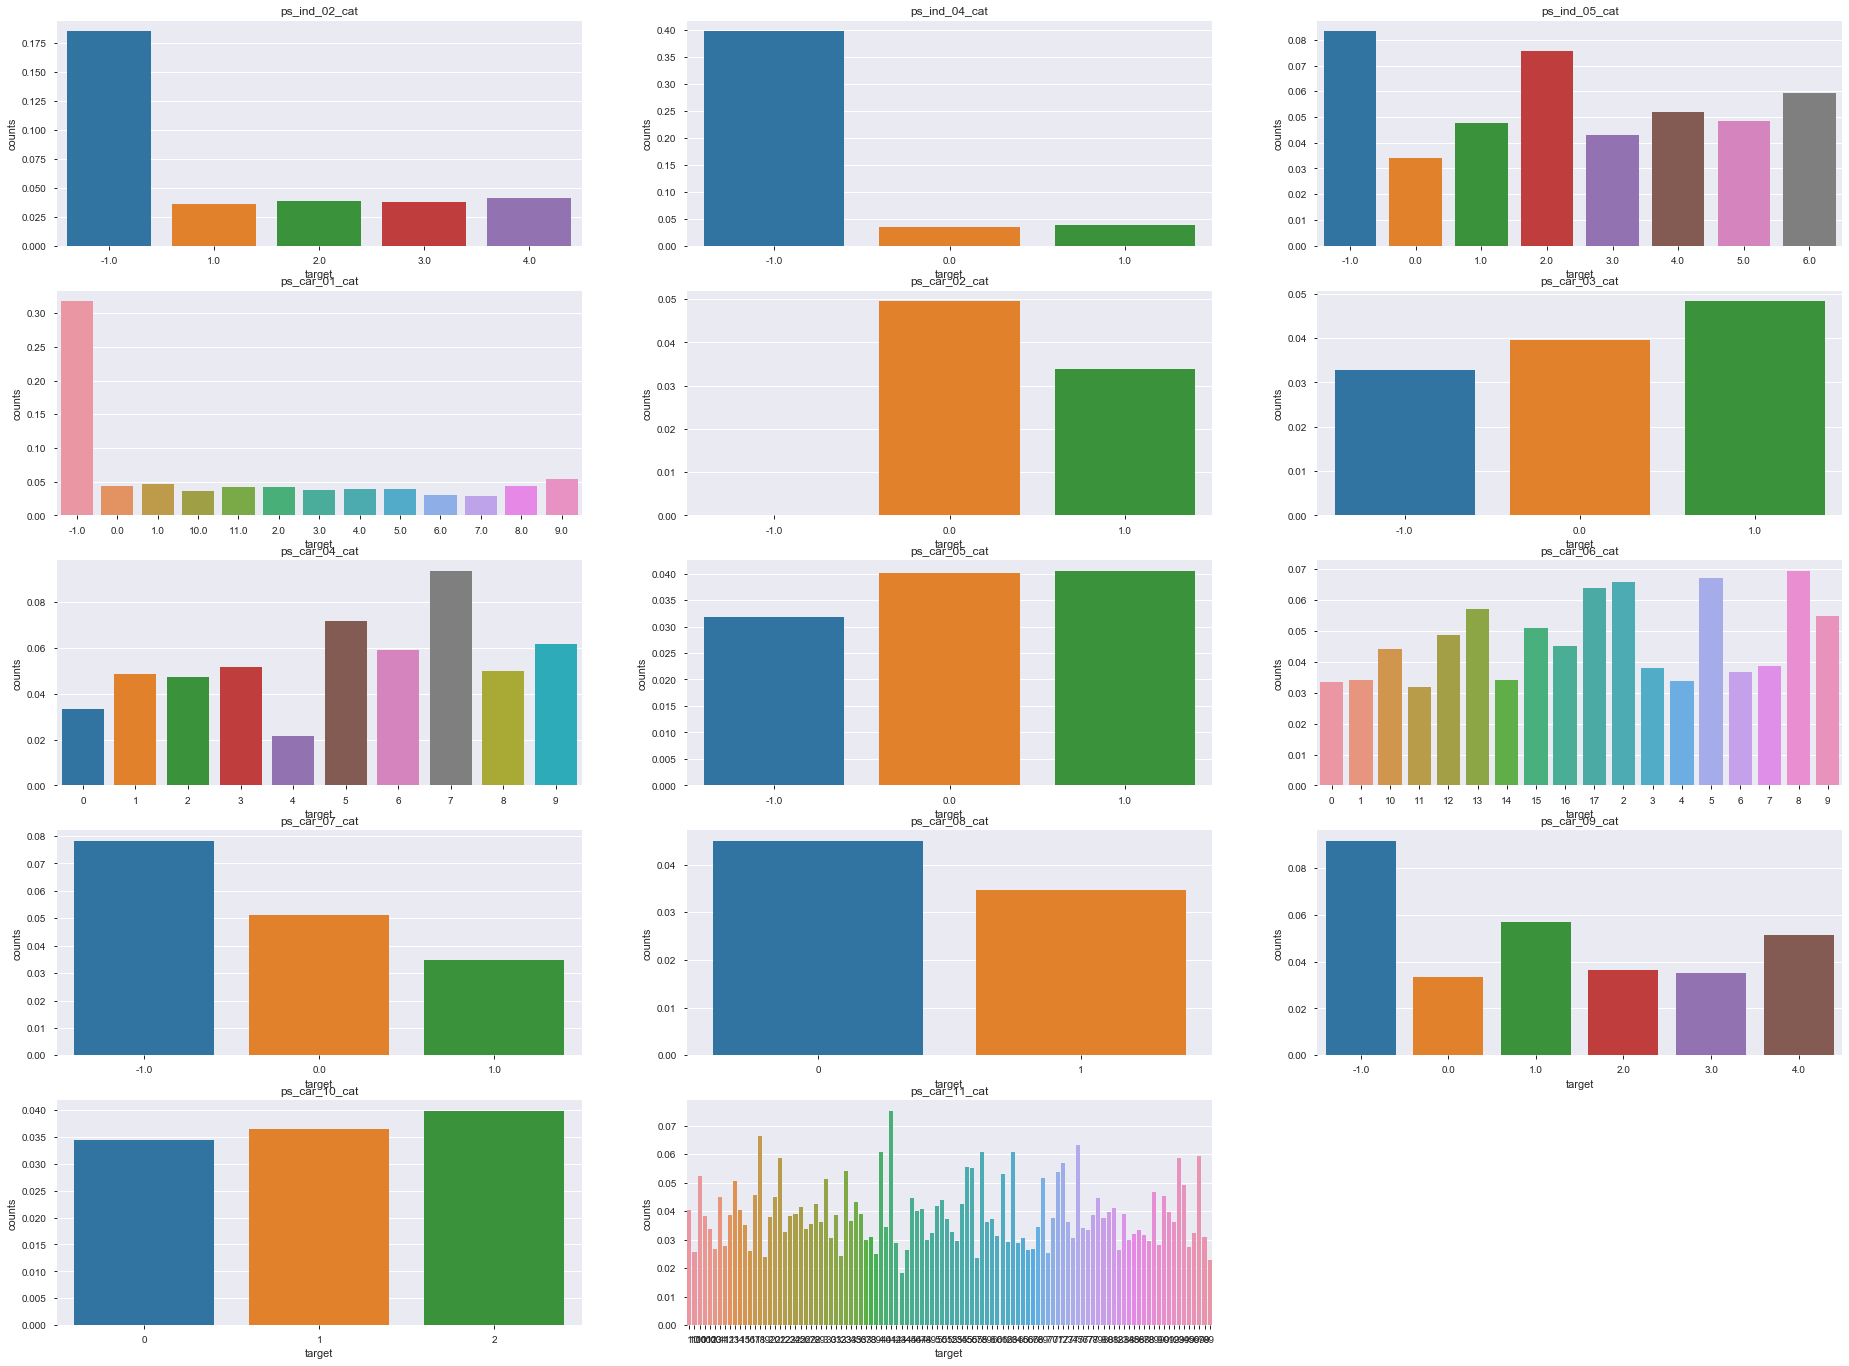

In [36]:
train_cate = train.fillna(-1).copy()
plt.figure(figsize = (32, 24))
k = 0
for col in cat_cols:
    k += 1
    names = []
    cate_t0 = []
    cate_t1 = []
    one_list = []
    for i in train_cate[col].unique():
        names.append(str(i))
        target = train_cate.loc[train_cate[col] == i, ['target']]
        if len(target['target'].unique()) == 2:
            cate_t0.append(target['target'].value_counts(sort = False)[0])
            cate_t1.append(target['target'].value_counts(sort = False)[1])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 1: 
            cate_t0.append(0)
            cate_t1.append(target['target'].value_counts()[0])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 0:
            cate_t0.append(target['target'].value_counts()[0])
            cate_t1.append(0)
        
    for i in zip(cate_t0, cate_t1):
        one_list.append(i[1] / (i[0] + i[1]))
    plt.subplot(5, 3, k)
    plt.title(col)
    data = pd.DataFrame({'target':  names, 'counts': one_list})
    sns.barplot(x = 'target', y = 'counts', data = data)
##ps_car_08_cat实际上是二分类特征

#### 训练数据多分类特征取值数量占比

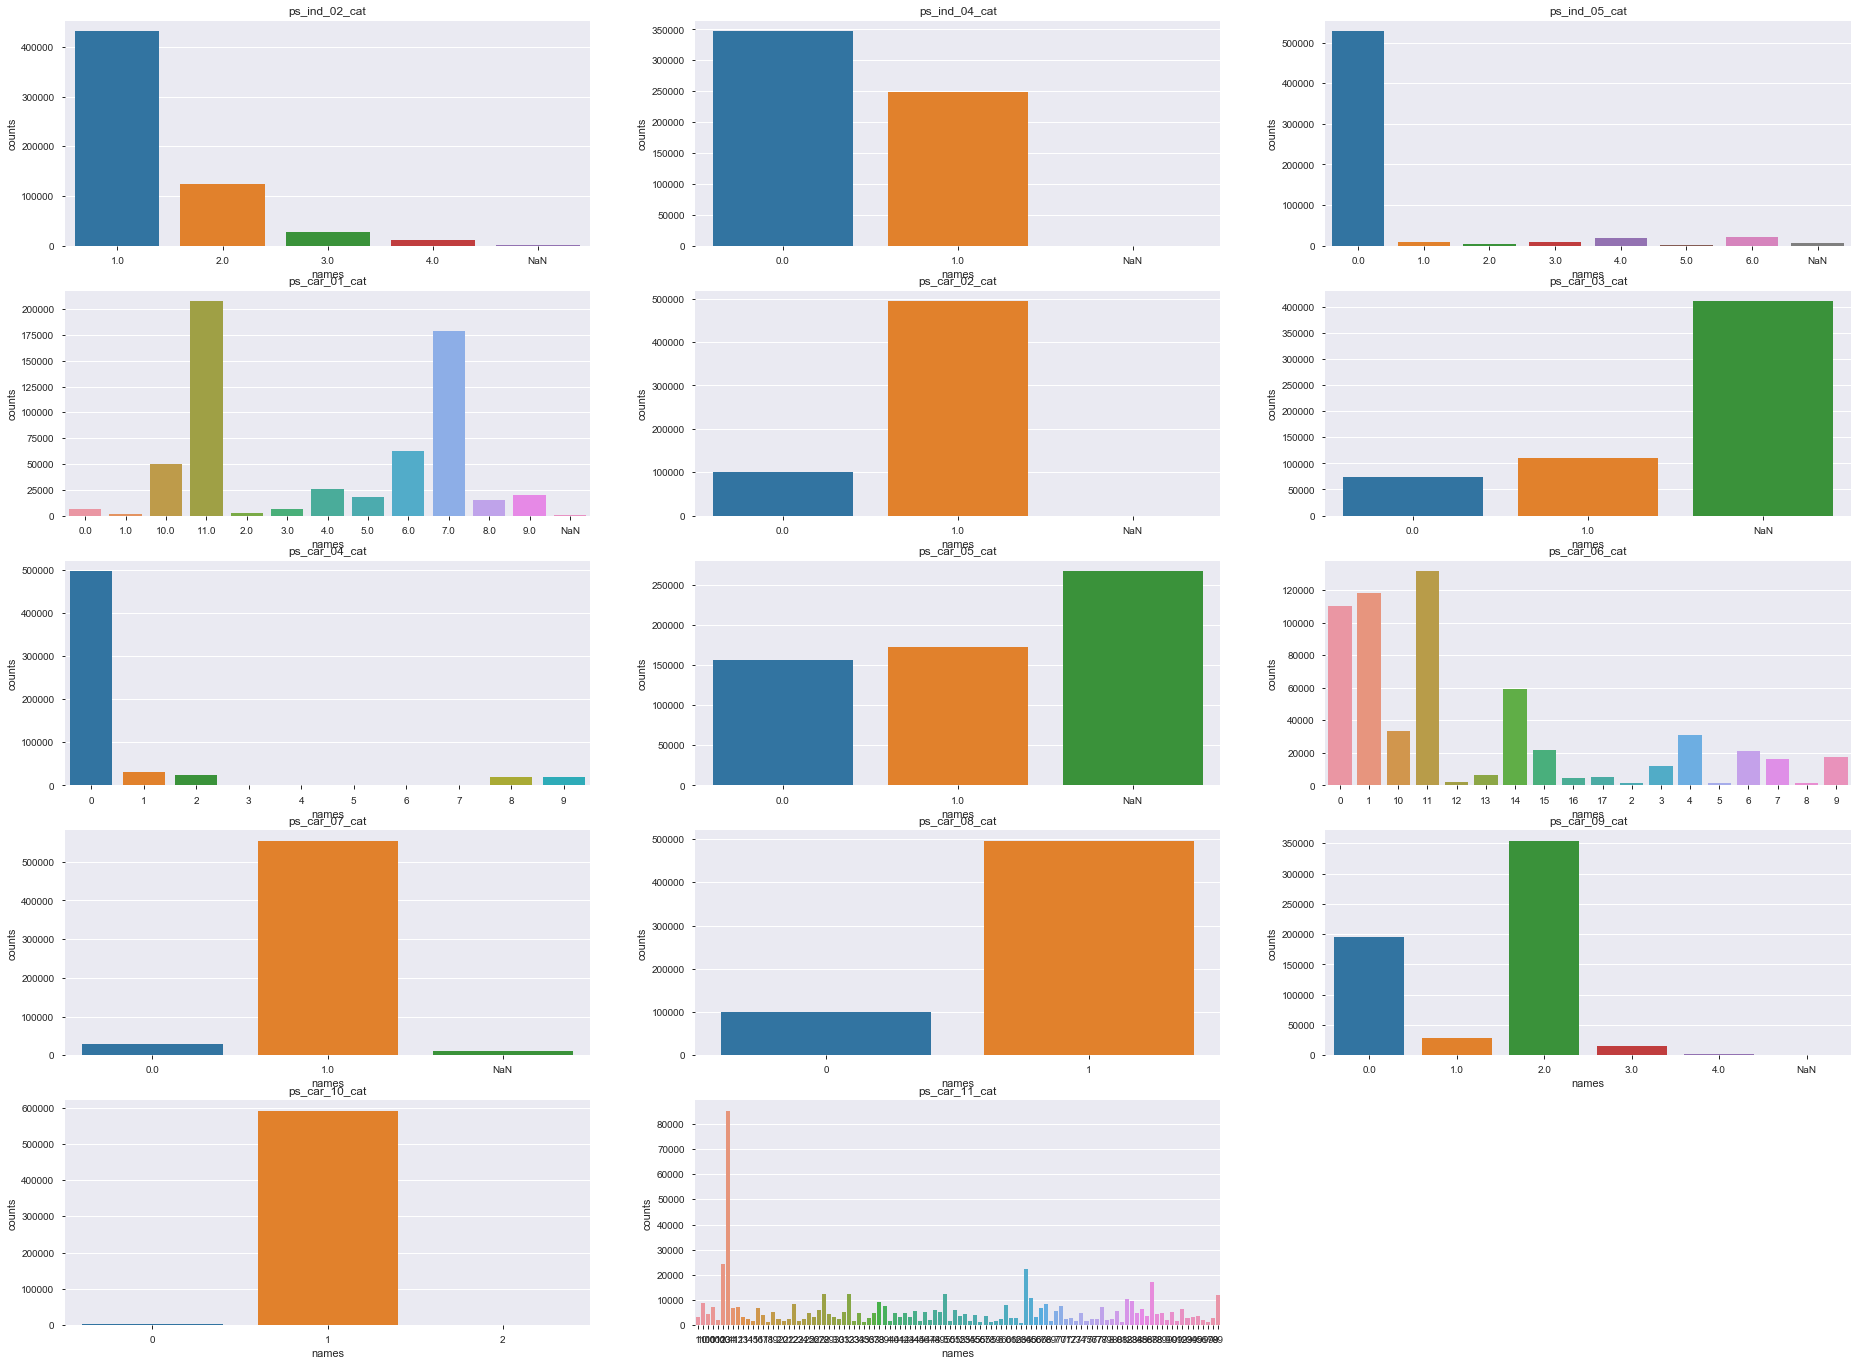

In [38]:
k = 0
plt.figure(figsize = (32, 24))
for col in cat_cols:
    k += 1
    names = list(train[col].value_counts().index.astype('str'))
    counts = list(train[col].value_counts().values.astype('float64'))
    if col in train_col_missing:
        names.append('NaN')
        counts.append(len(train[col]) - sum(counts))
    plt.subplot(5, 3, k)
    plt.title(col)
    data = pd.DataFrame({'names': names, 'counts': counts})
    sns.barplot(x = 'names', y = 'counts', data = data)

#### 测试数据多分类特征取值数量占比

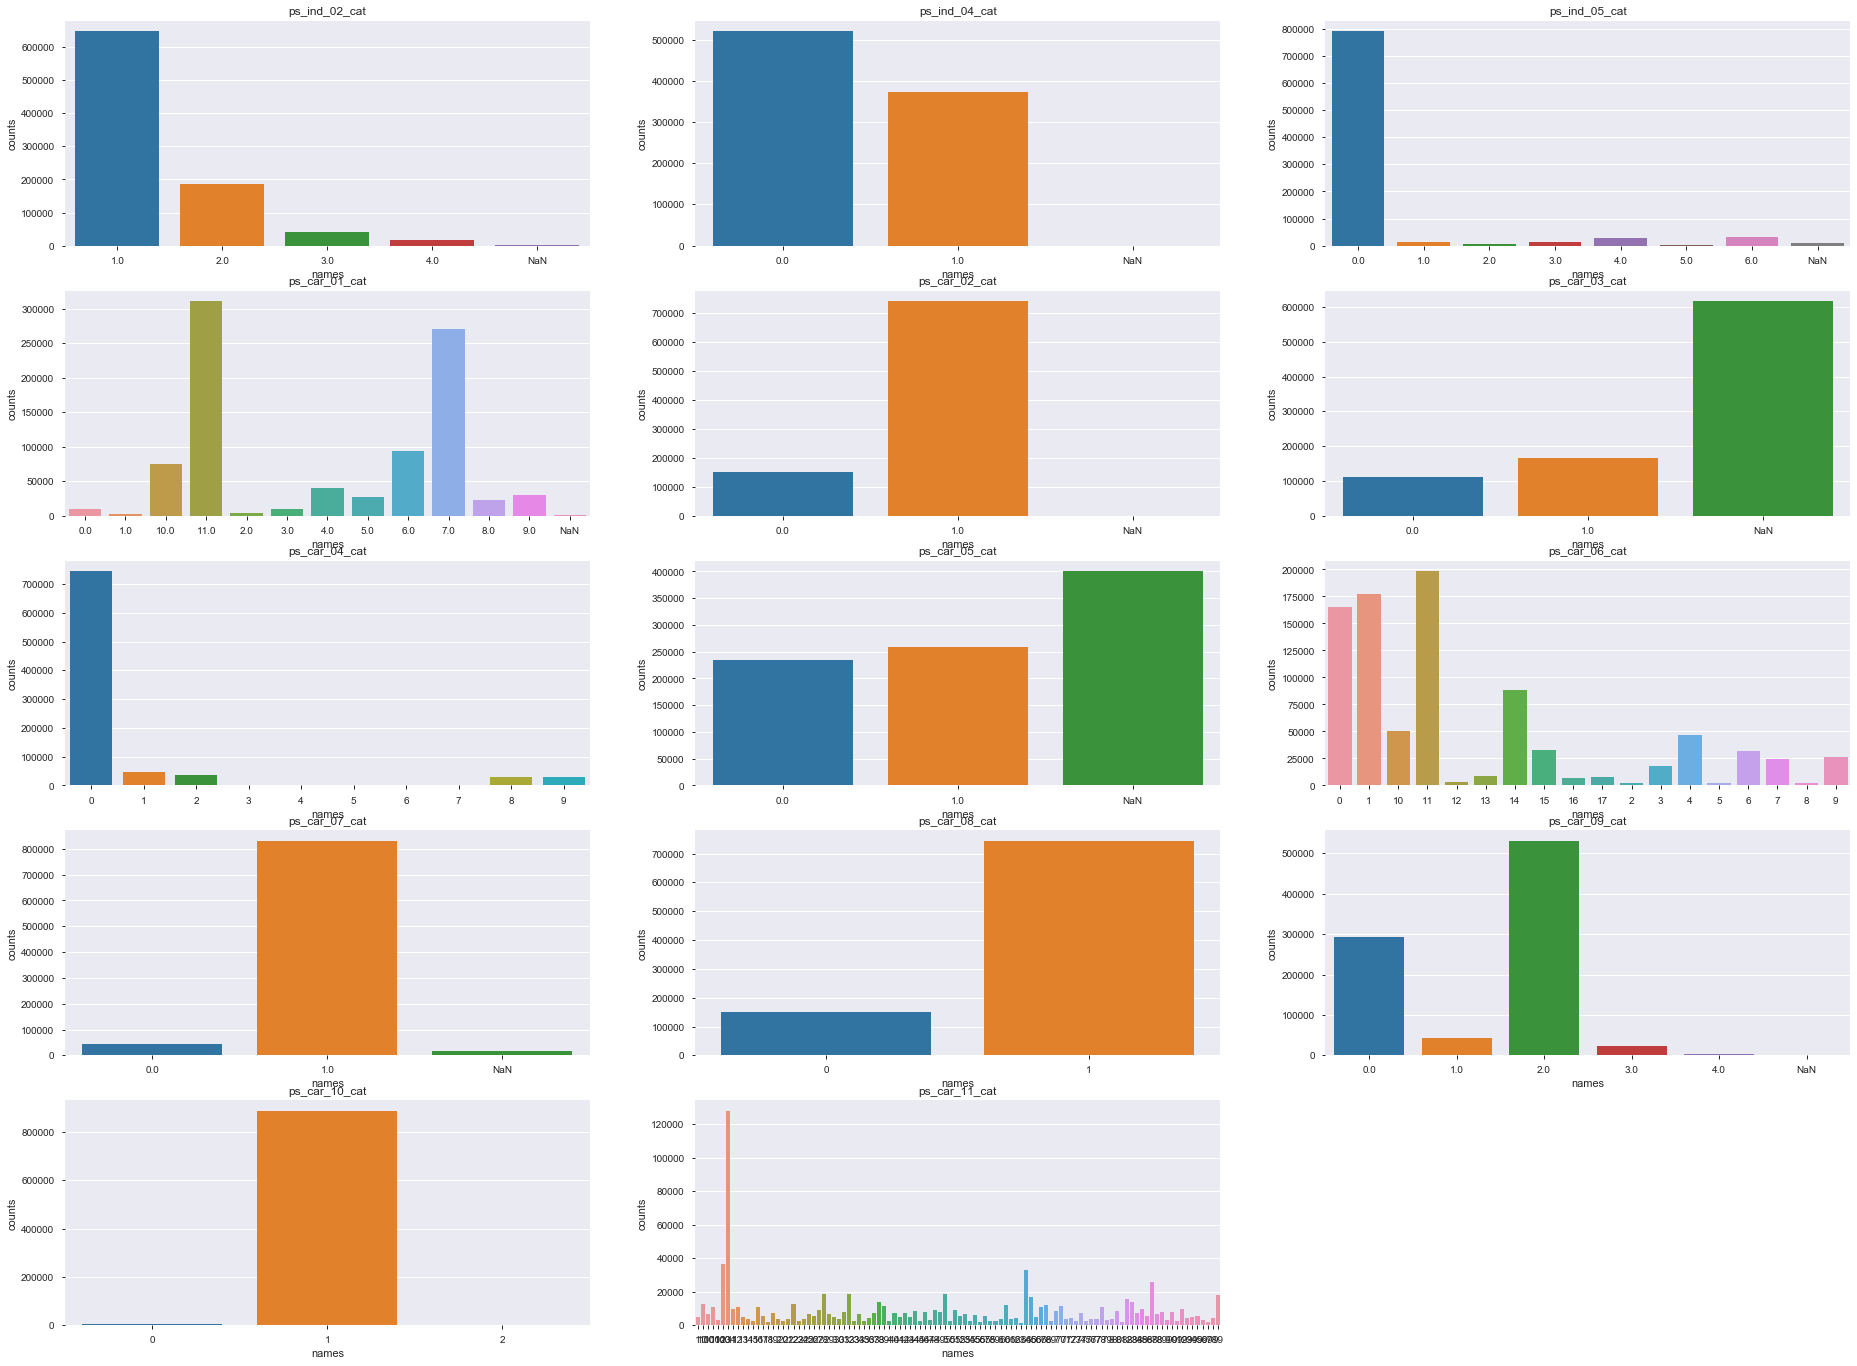

In [37]:
k = 0
plt.figure(figsize = (32, 24))
for col in cat_cols:
    k += 1
    names = list(test[col].value_counts().index.astype('str'))
    counts = list(test[col].value_counts().values.astype('float64'))
    if col in test_col_missing:
        names.append('NaN')
        counts.append(len(test[col]) - sum(counts))
    plt.subplot(5, 3, k)
    plt.title(col)
    data = pd.DataFrame({'names': names, 'counts': counts})
    sns.barplot(x = 'names', y = 'counts', data = data)

### 顺序与连续特征分析

In [39]:
list1 = []
for col in cate_con_or_ord:
    list1.append((col, len(train[col].unique())))
for i in sorted(list1, key = lambda x: x[1], reverse = True):
    print(i)

('ps_car_13', 70482)
('ps_reg_03', 5013)
('ps_car_14', 850)
('ps_car_12', 184)
('ps_calc_10', 26)
('ps_calc_14', 24)
('ps_calc_11', 20)
('ps_reg_02', 19)
('ps_car_15', 15)
('ps_ind_15', 14)
('ps_calc_13', 14)
('ps_ind_03', 12)
('ps_calc_06', 11)
('ps_calc_08', 11)
('ps_calc_12', 11)
('ps_reg_01', 10)
('ps_calc_01', 10)
('ps_calc_02', 10)
('ps_calc_03', 10)
('ps_calc_07', 10)
('ps_ind_01', 8)
('ps_calc_09', 8)
('ps_calc_05', 7)
('ps_calc_04', 6)
('ps_ind_14', 5)
('ps_car_11', 5)


#### 顺序或连续训练集数据的直方图

In [40]:
cf.datagen.lines(20).iplot(kind = 'histogram', subplots = True, shape = (5, 4))

In [41]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)

train[conti_or_ord].iplot(kind = 'histogram', subplots = True, shape = (5, 5))

KeyboardInterrupt: 

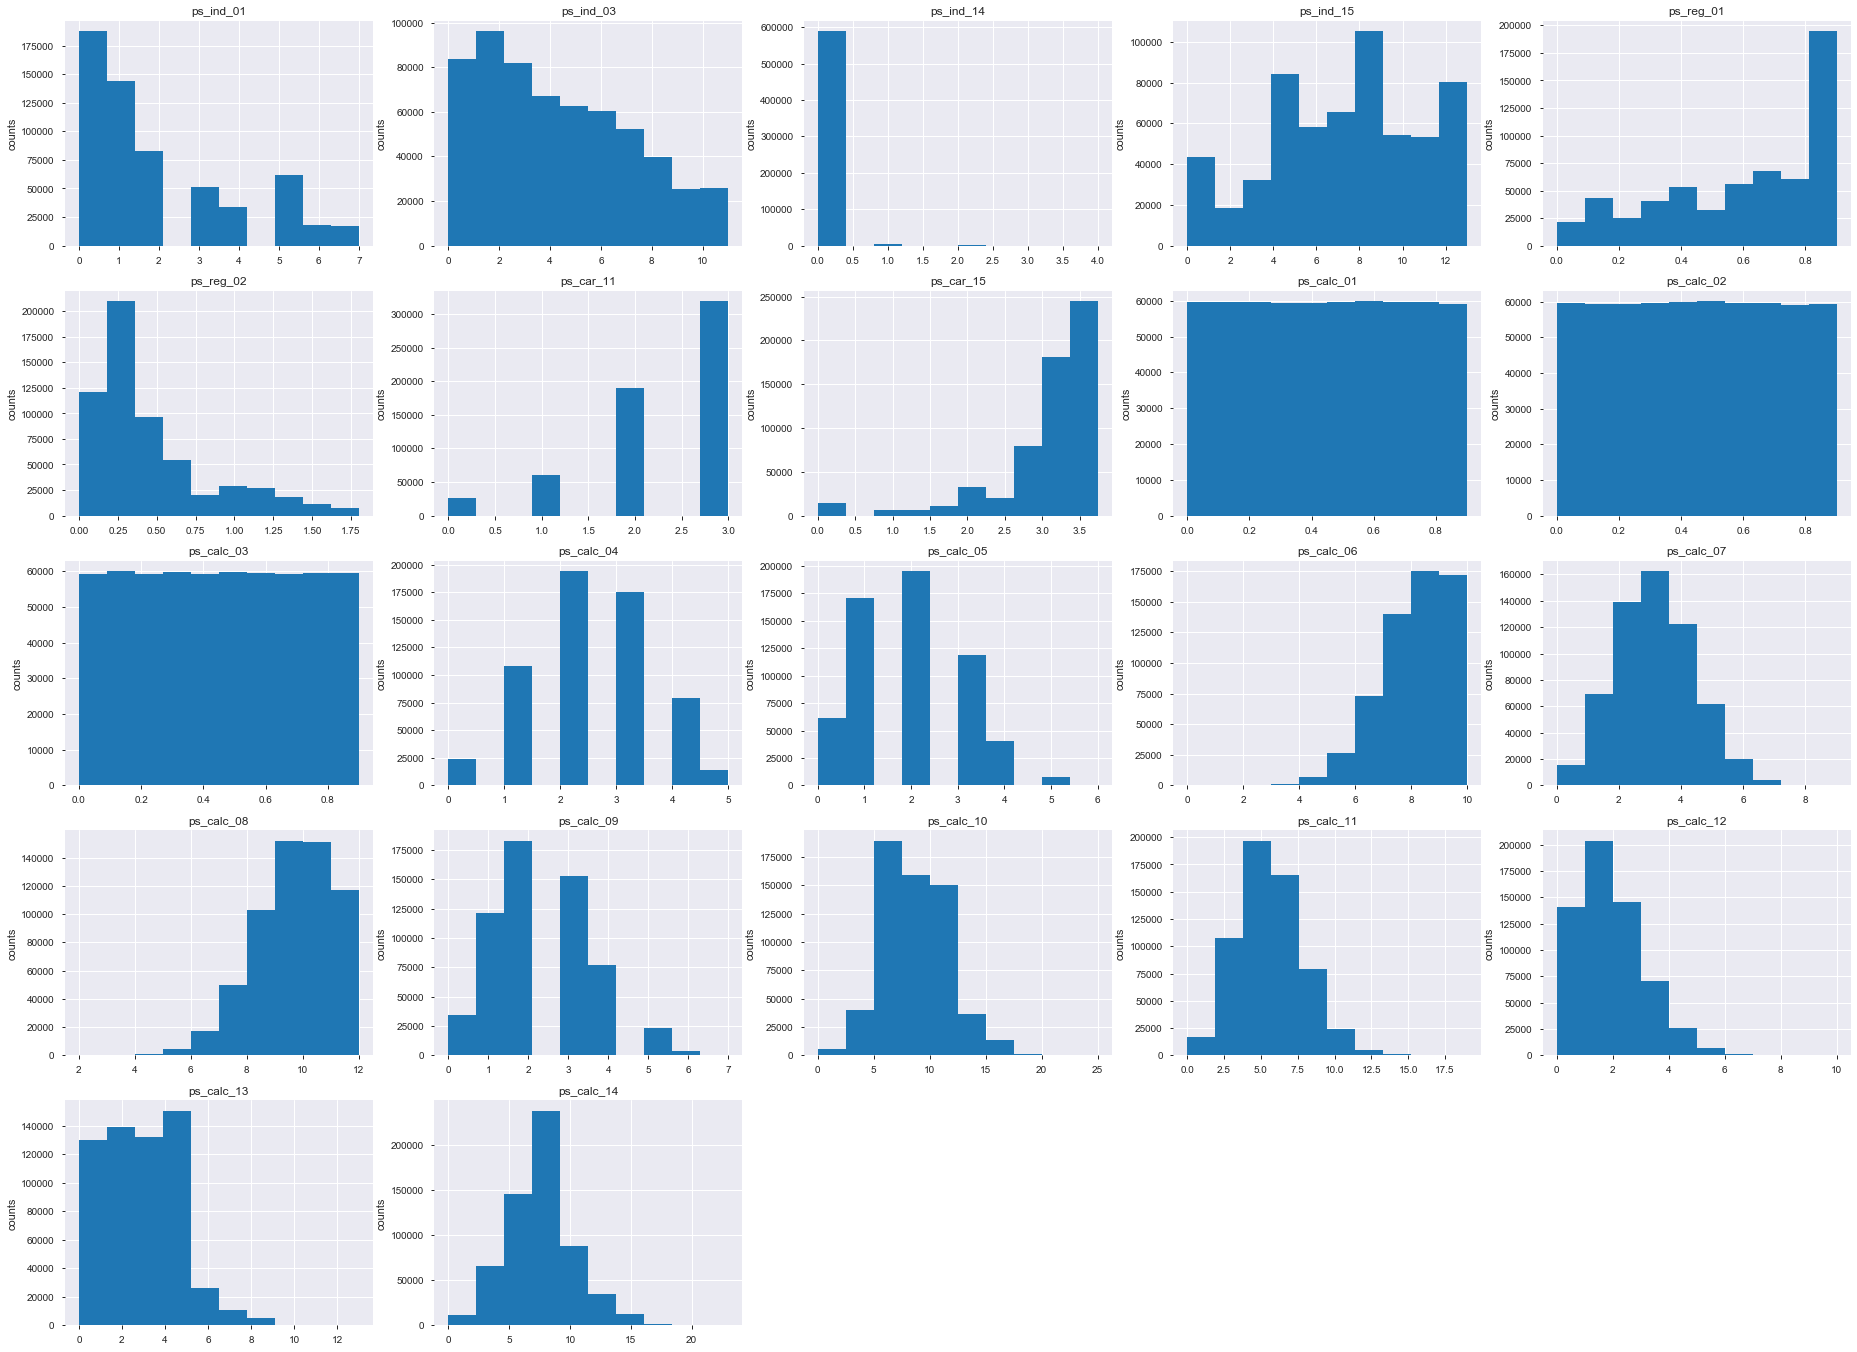

In [44]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    plt.subplot(5, 5, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.hist(train[col].dropna())

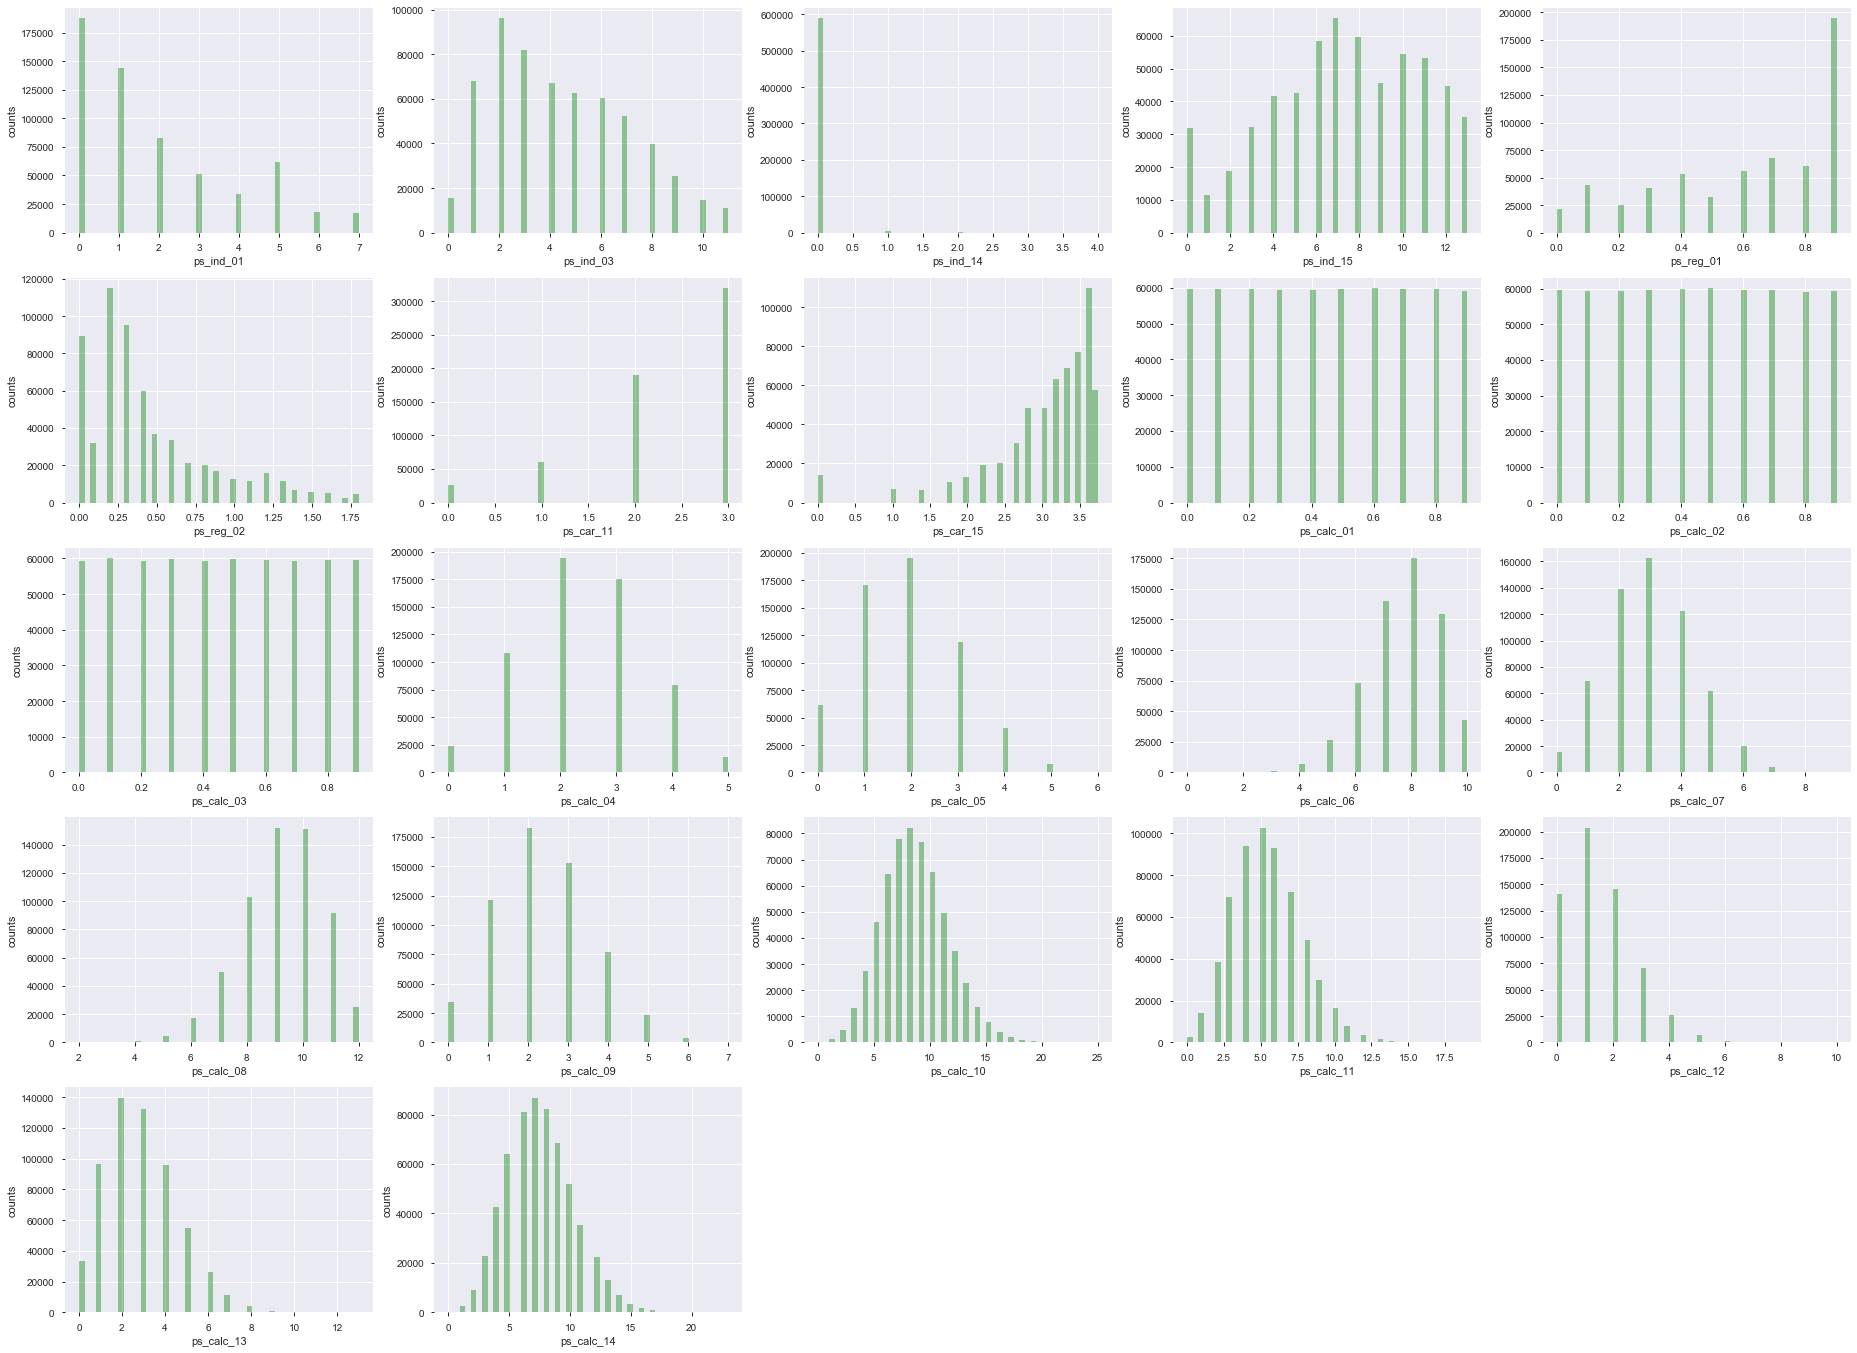

In [48]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    plt.subplot(5, 5, k)
    #plt.title(col)
    plt.ylabel('counts')
    sns.distplot(train[col].dropna(), kde = False, color = 'g')

#### 顺序或连续测试集数据的直方图

In [ ]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
train[conti_or_ord].iplot(kind = 'histogram', subplots = True, shape = (5, 5))

In [ ]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    plt.subplot(5, 5, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.hist(test[col].dropna())

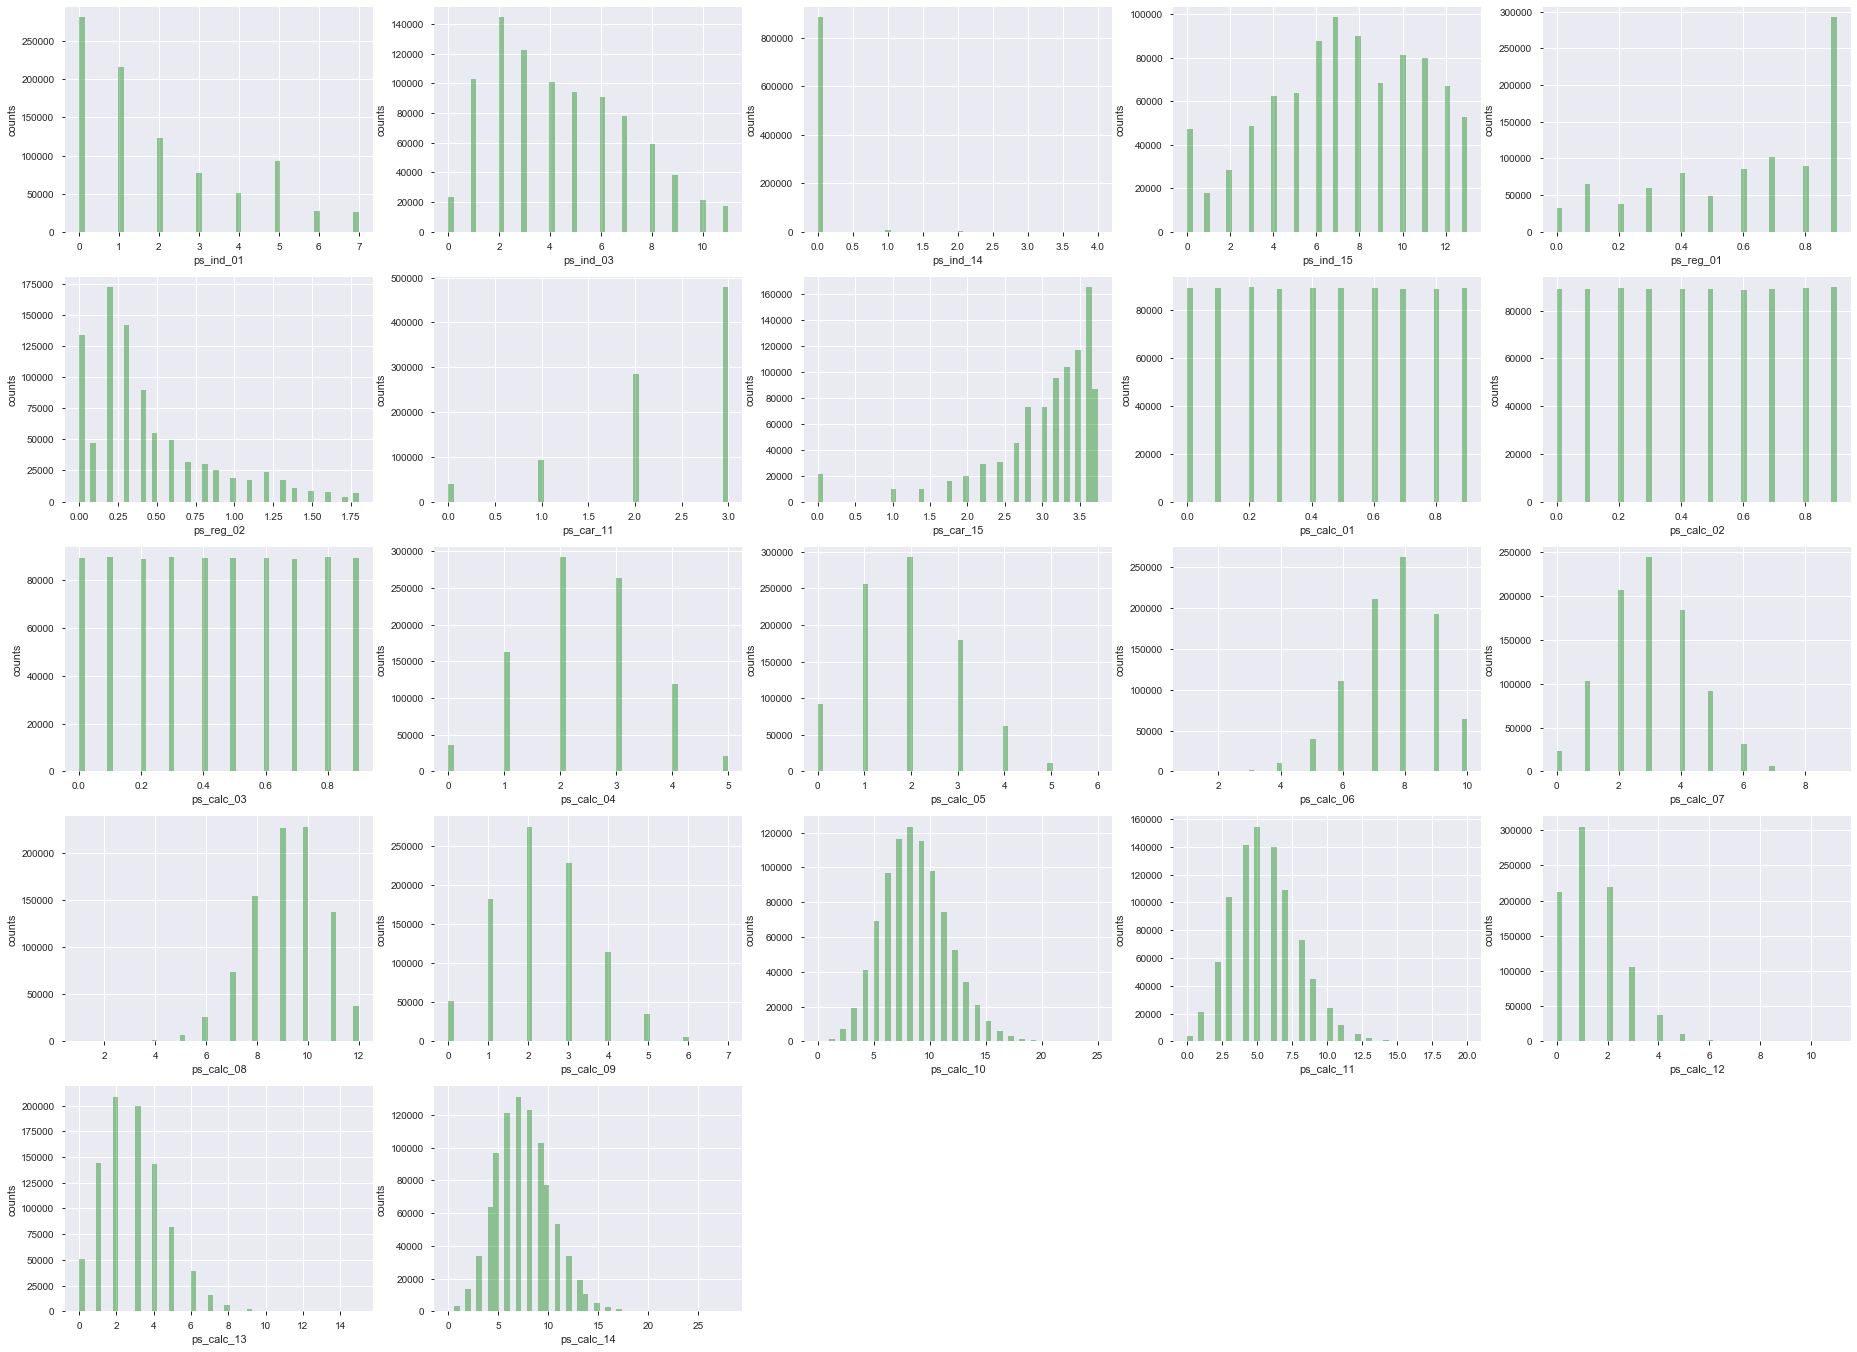

In [50]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    plt.subplot(5, 5, k)
    #plt.title(col)
    plt.ylabel('counts')
    sns.distplot(test[col].dropna(), color = 'g', kde = False)

#### 训练集顺序数据的带KDE曲线图的直方图

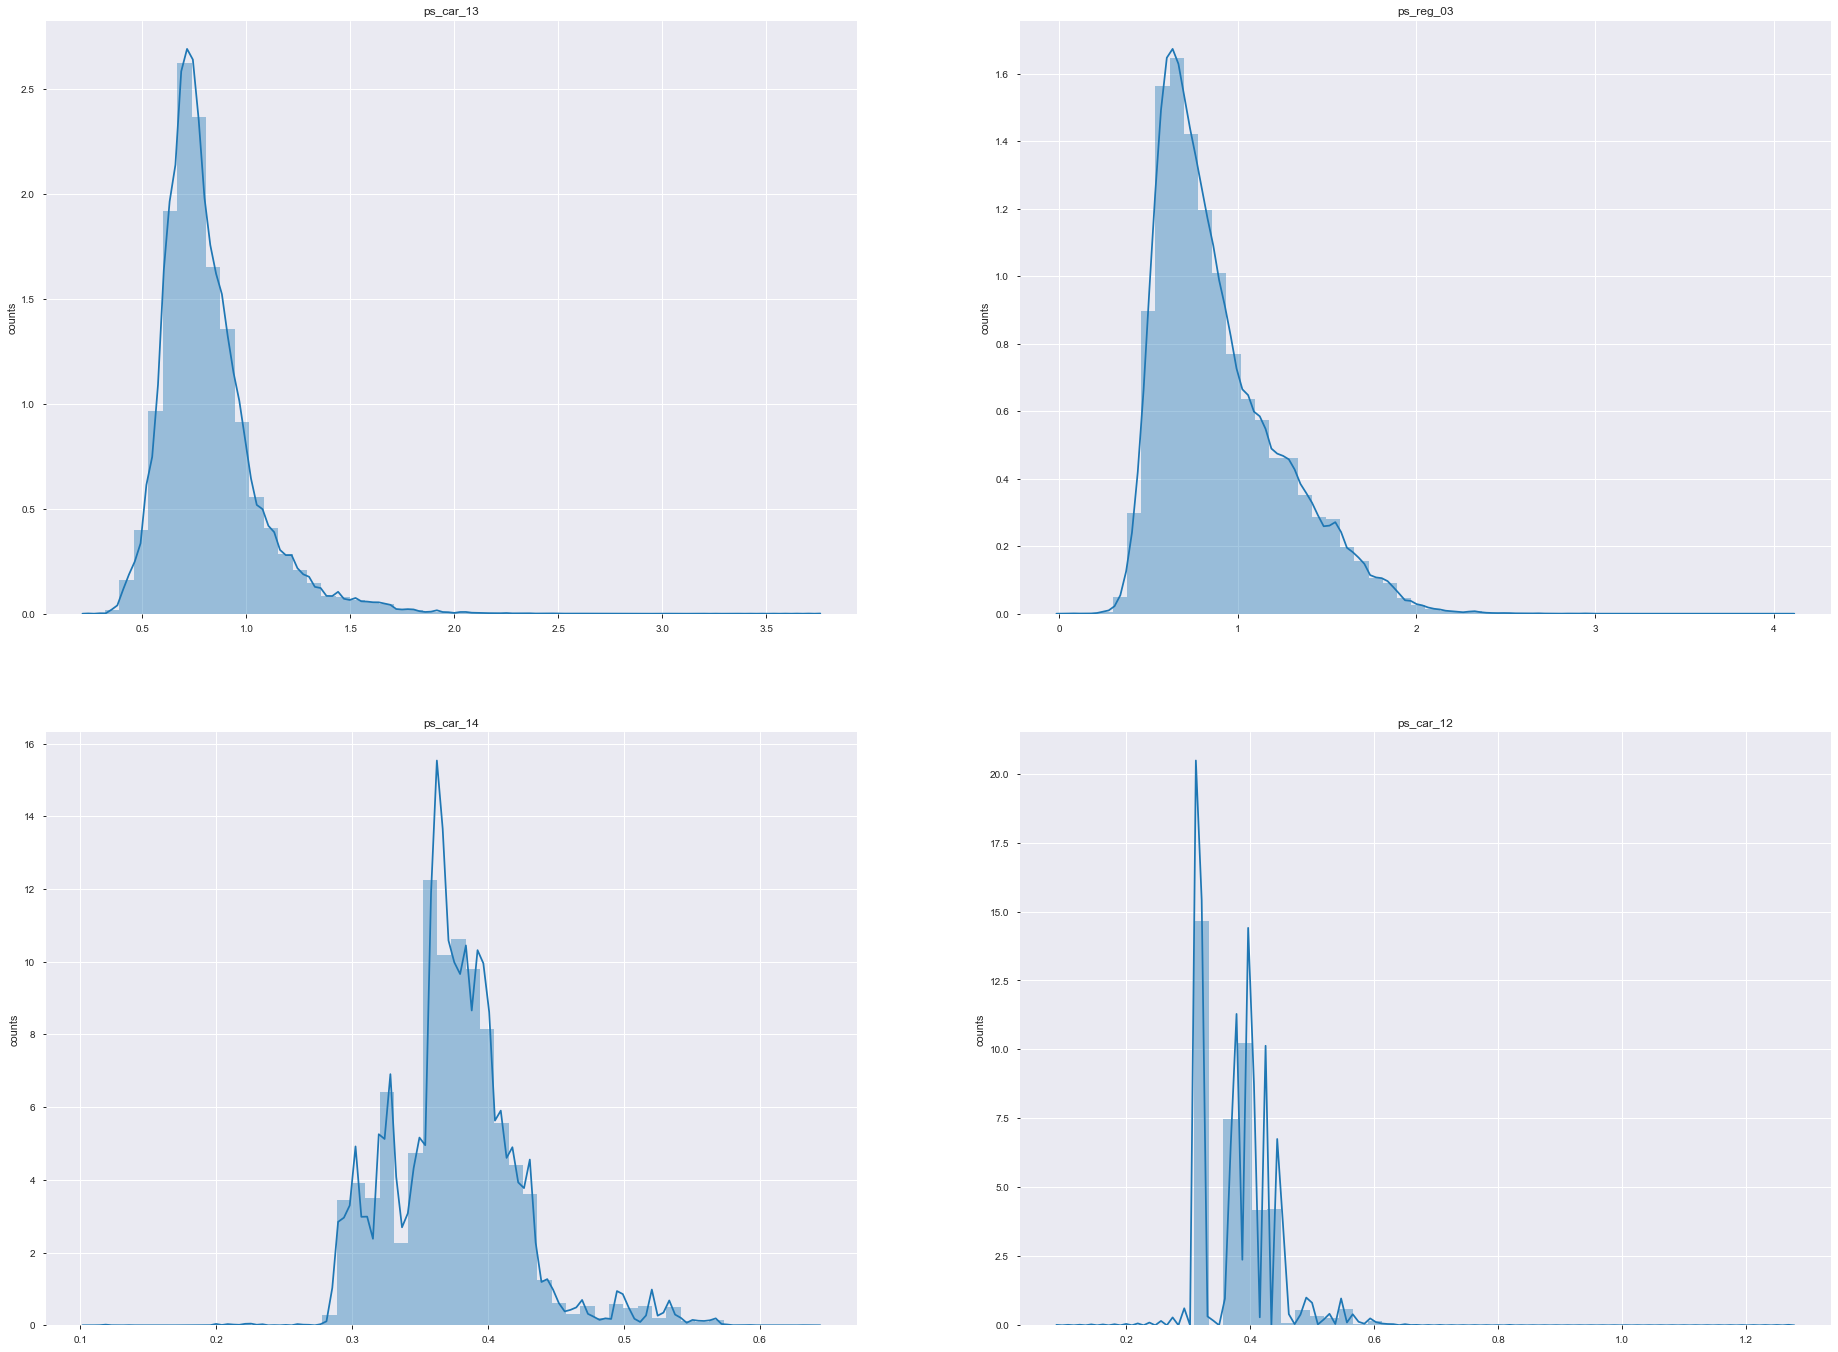

In [51]:
k = 0
plt.figure(figsize = (32, 24))
for col in conti_cols:
    k += 1
    plt.subplot(2, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    sns.distplot(tuple(train[col].dropna()))

#### 测试集顺序数据的带KDE曲线图的直方图

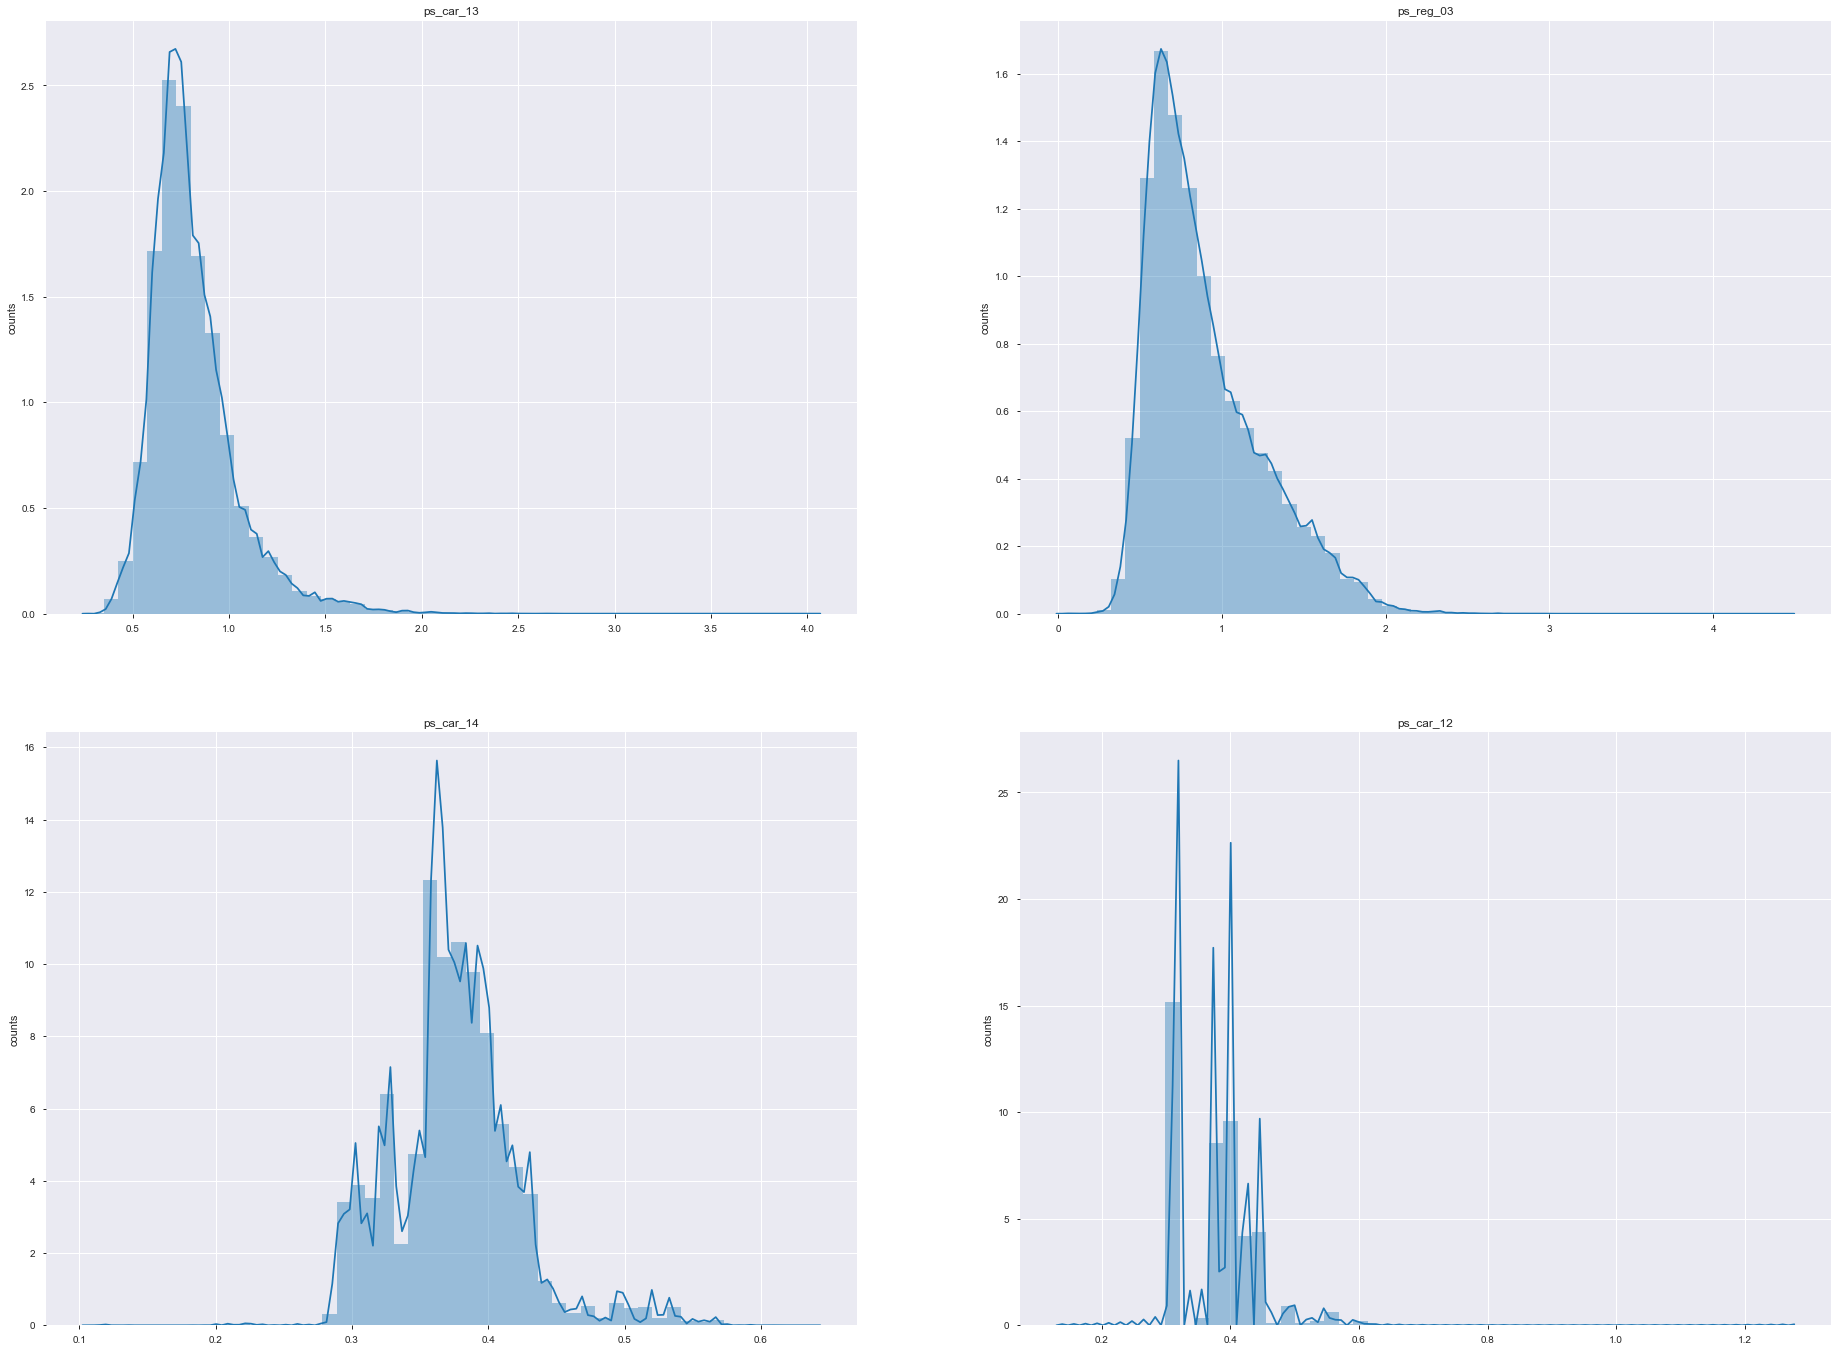

In [52]:
k = 0
plt.figure(figsize = (32, 24))
for col in conti_cols:
    k += 1
    plt.subplot(2, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    sns.distplot(tuple(test[col].dropna()))

#### 顺序或连续数据对target的影响

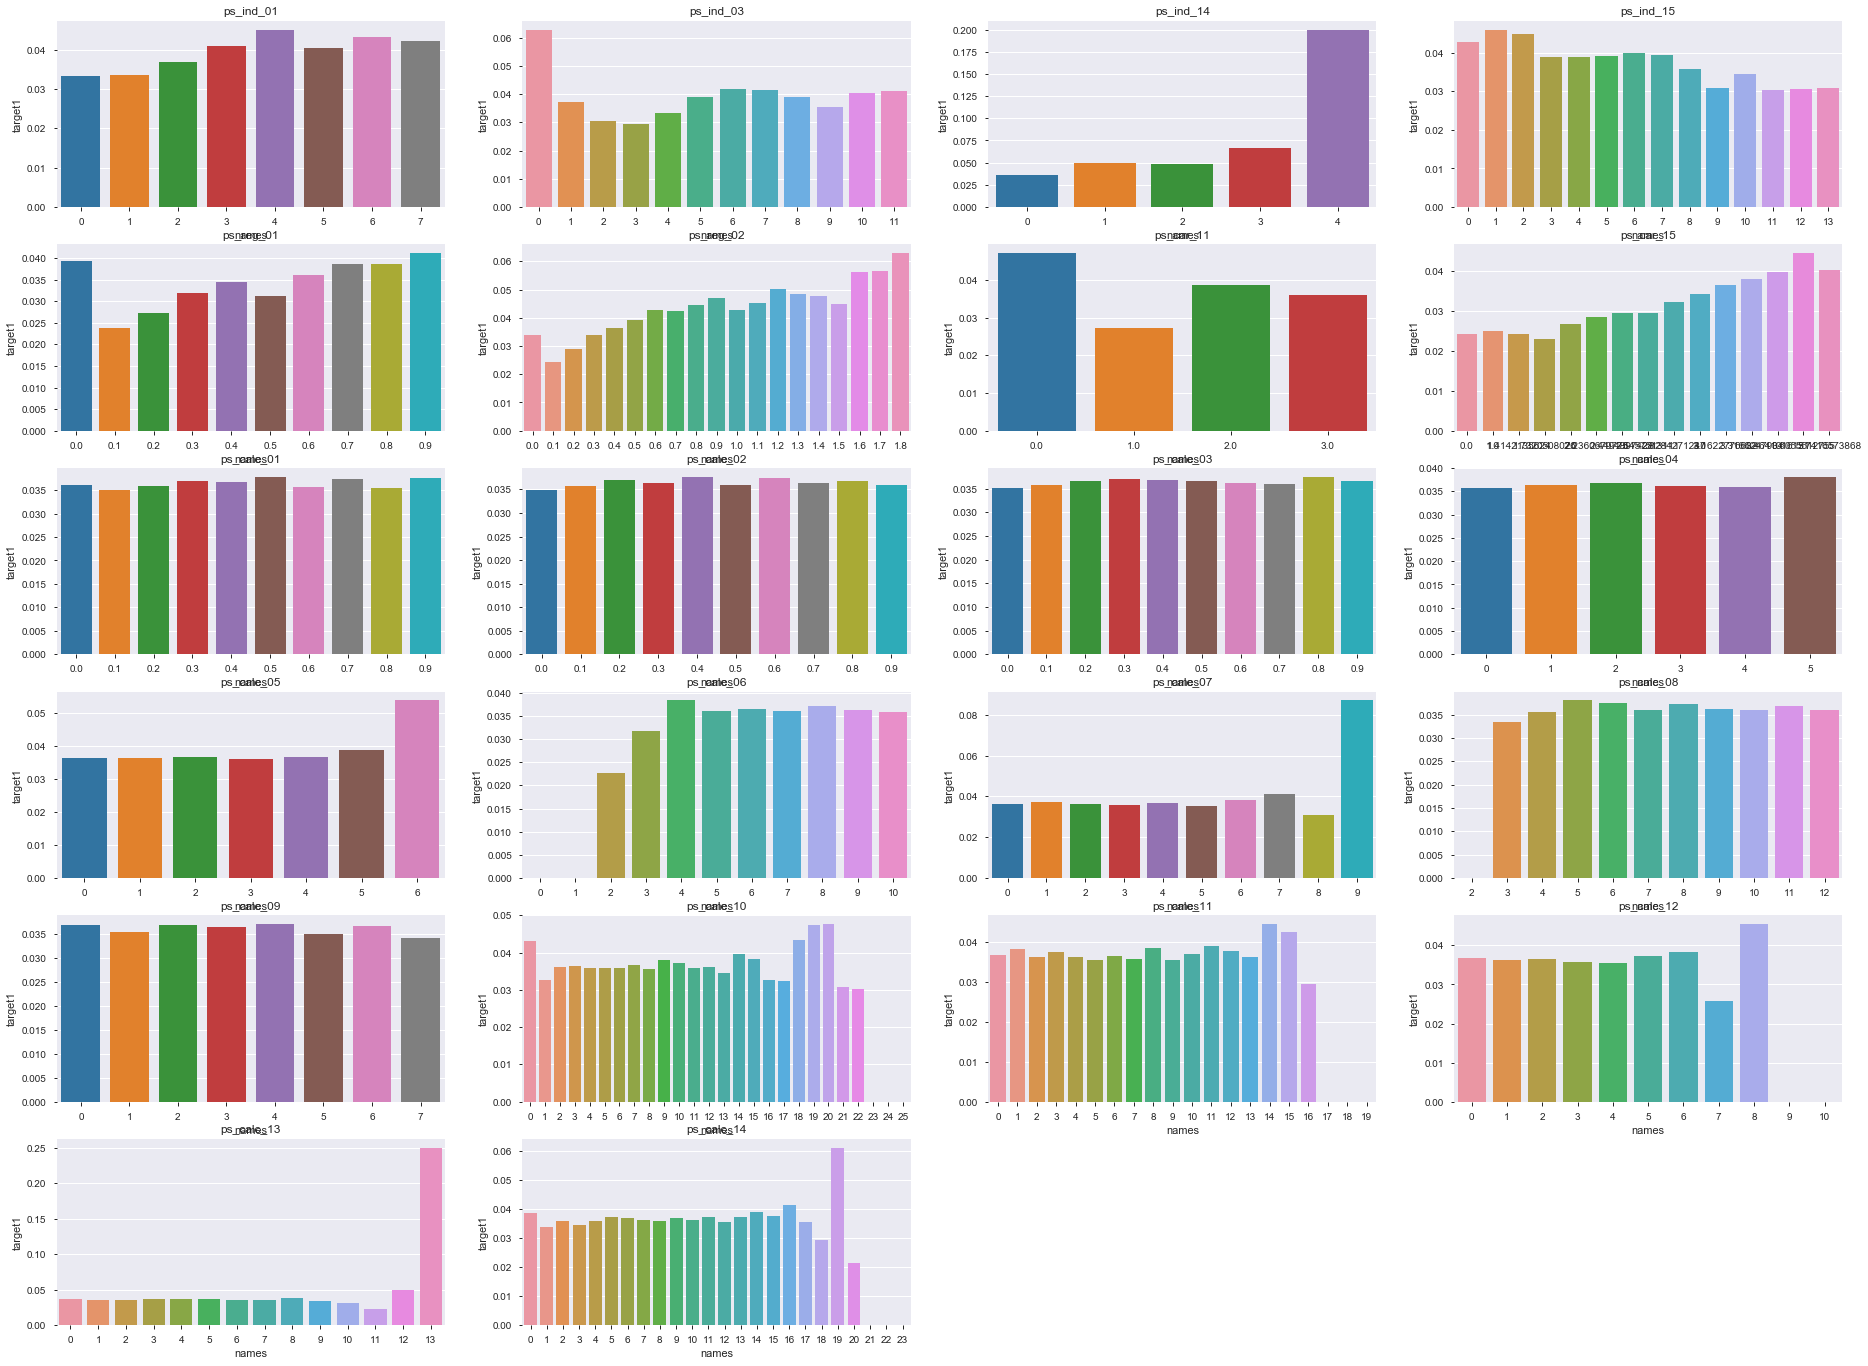

In [54]:
##第一种写法
train_rank = train[conti_or_ord].copy()
train_rank = train_rank.dropna()
train_rank['target'] = train['target']
train_rank1 = train_rank[train_rank['target'] == 1]
train_rank0 = train_rank[train_rank['target'] == 0]

k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    trace1 = []
    trace0 = []
    names = []
    one_list = []
    for i in train_rank[col].unique():
        names.append(i)
        trace1.append(len(train_rank1[train_rank1[col] == i]))
        trace0.append(len(train_rank0[train_rank0[col] == i]))
    for (x, y) in zip(trace0, trace1):
        one_list.append(y / (x + y))
    plt.subplot(6, 4, k)
    plt.title(col)
    data = pd.DataFrame({'names': names, 'target1': one_list})
    sns.barplot(x = 'names', y = 'target1', data = data)

In [ ]:
##第二种写法
train_rank = train[conti_or_ord].copy()
train_rank = train_rank.dropna()
train_rank['target'] = train['target']
train_rank1 = train_rank[train_rank['target'] == 1]
train_rank0 = train_rank[train_rank['target'] == 0]

k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    one_list = []
    names = train_rank[col].value_counts().index
    trace1 = train_rank1[col].value_counts()[names].values
    trace0 = train_rank0[col].value_counts()[names].values
    for (x, y) in zip(trace0, trace1):
        one_list.append(y / (x + y))
    plt.subplot(6, 4, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(names, one_list)

#### 对不同target取值的连续变量做KDE密度曲线图

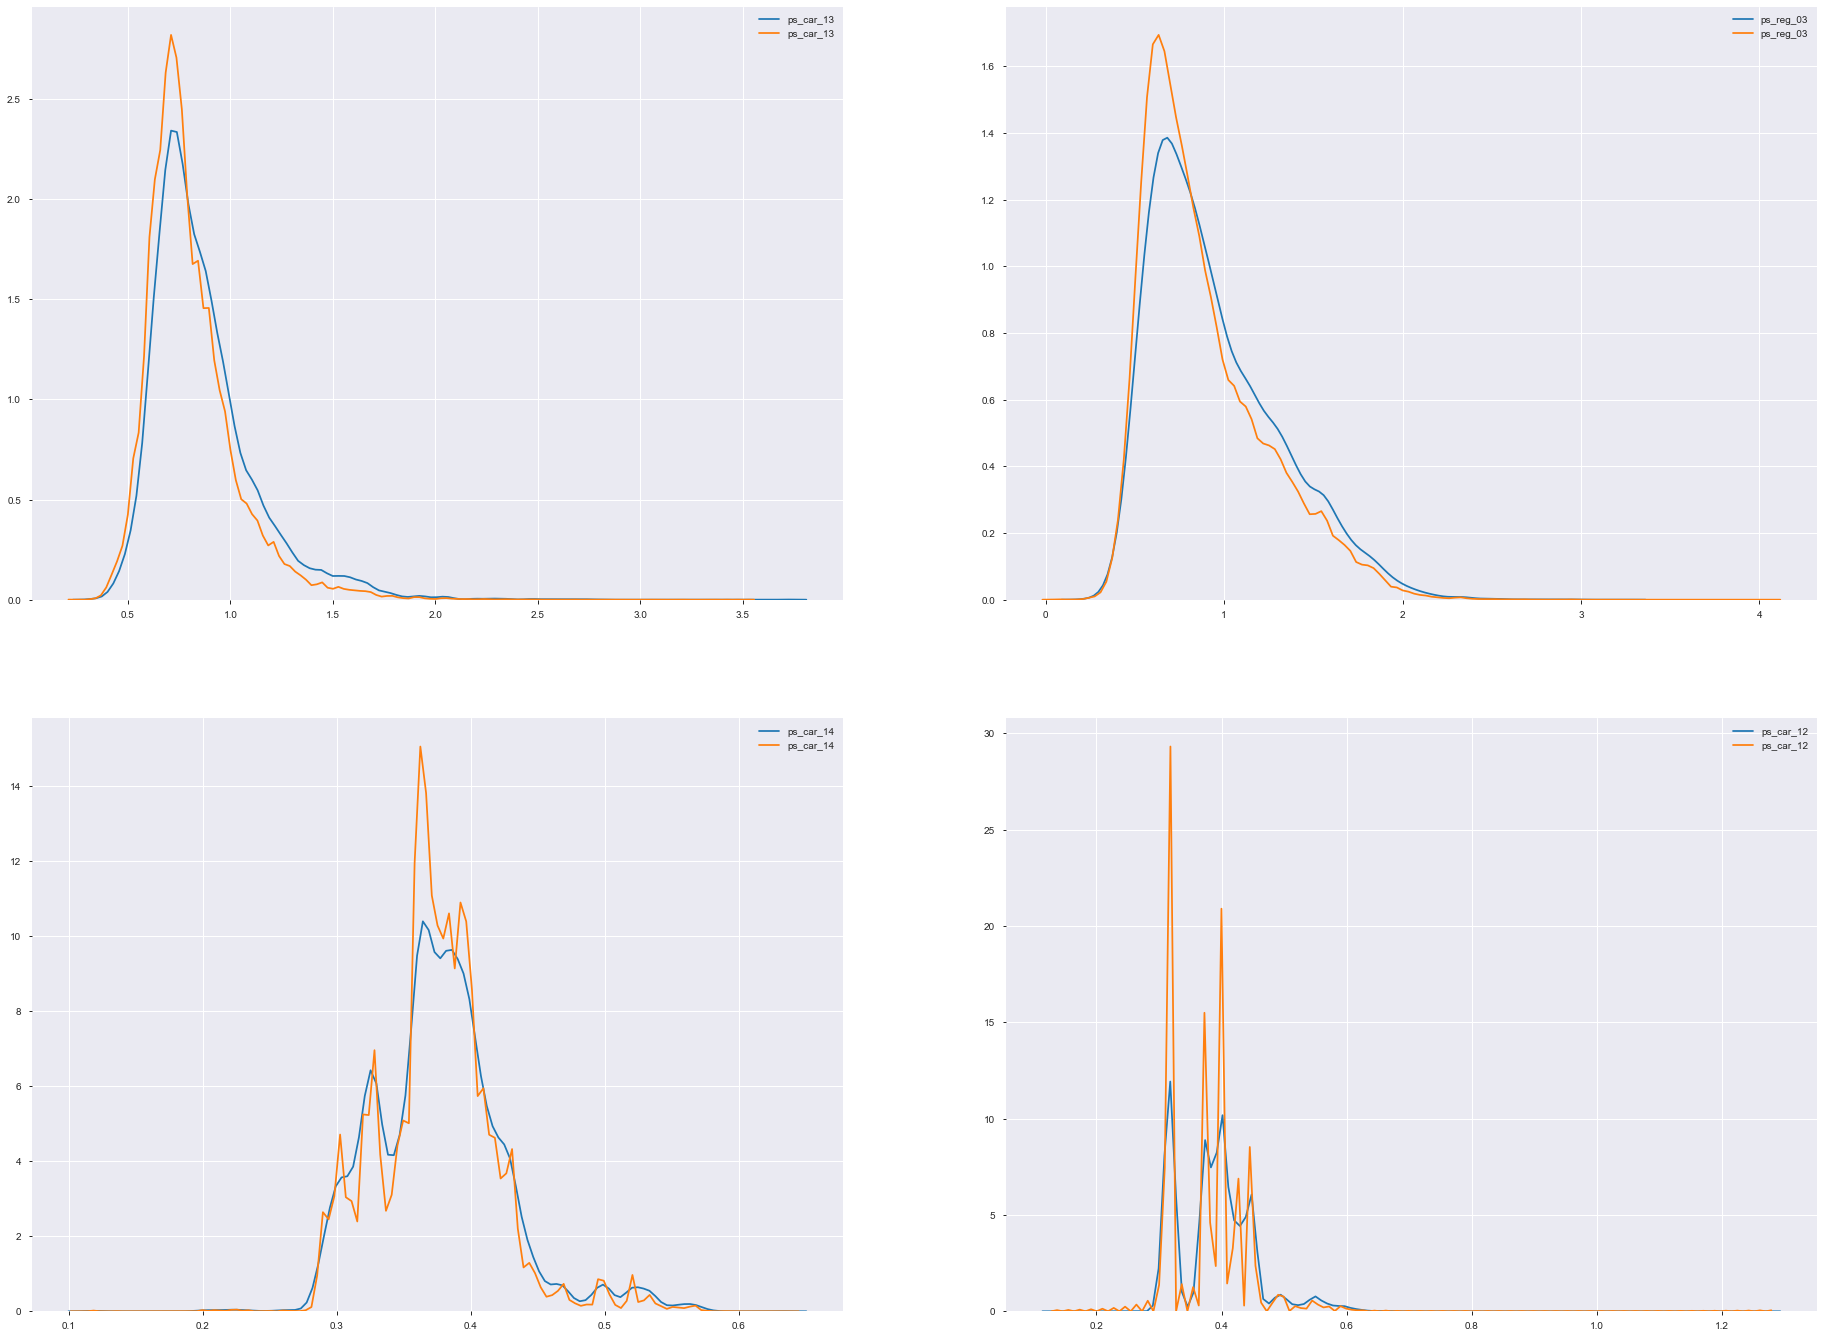

In [55]:
train_rank_count = train[conti_cols].copy()
train_rank_count['target'] = train['target']
train_rank_count = train_rank_count.dropna()
train_rank0_count = train_rank_count[train_rank_count['target'] == 1]
train_rank1_count = train_rank_count[train_rank_count['target'] == 0]


k = 0
plt.figure(figsize = (32, 24))
for col in conti_cols:
    k += 1
    plt.subplot(2, 2, k)
    sns.kdeplot(train_rank0_count[col])
    sns.kdeplot(train_rank1_count[col])

#### 有缺失数据的顺序或连续数据对target取值的影响

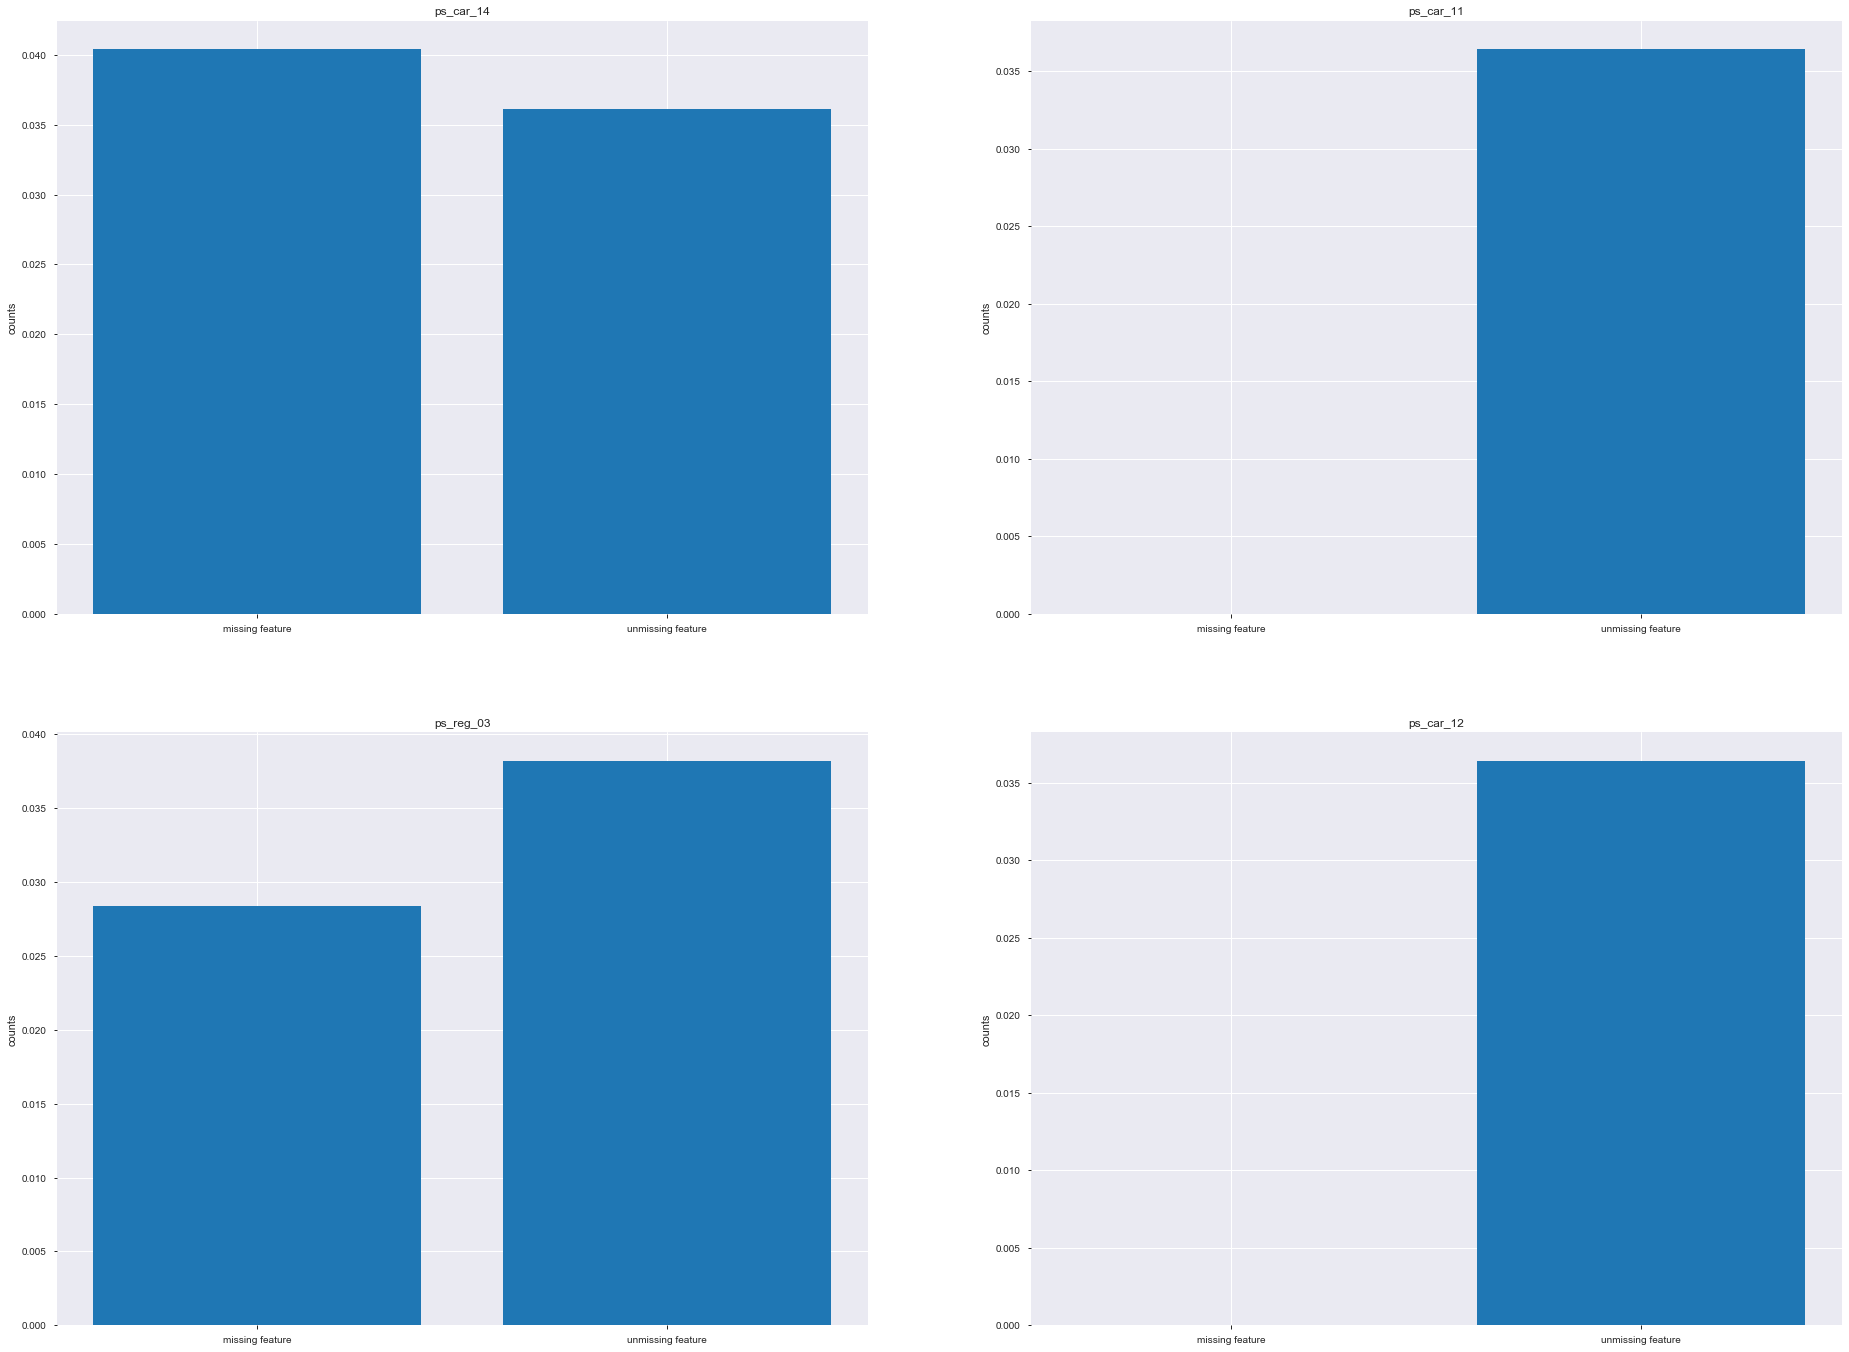

In [56]:
train_missing_cont_ord = list(set(train_col_missing).intersection(set(cate_con_or_ord)))
train_rank_missing_cont_ord = train[train_missing_cont_ord].copy()
train_rank_missing_cont_ord['target'] = train['target']
train_rank0_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 0]
train_rank1_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 1]

k = 0
plt.figure(figsize = (32, 24))
for col in train_missing_cont_ord:
    k += 1
    rank0_col_missing = train_rank0_missing_cont_ord[col].isnull().sum()
    rank0_col_unmissing = len(train_rank0_missing_cont_ord) - rank0_col_missing
    rank1_col_missing = train_rank1_missing_cont_ord[col].isnull().sum()
    rank1_col_unmissing = len(train_rank1_missing_cont_ord) - rank1_col_missing
    one_list = (rank1_col_missing / (rank1_col_missing + rank0_col_missing), 
                   rank1_col_unmissing / (rank1_col_unmissing + rank0_col_unmissing))
    plt.subplot(2, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(('missing feature', 'unmissing feature'), one_list)

In [63]:
train_missing_cont_ord = list(set(train_col_missing).intersection(set(cate_con_or_ord)))
train_rank_missing_cont_ord = train[train_missing_cont_ord].copy()
train_rank_missing_cont_ord['target'] = train['target']
train_rank0_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 0]
train_rank1_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 1]

k = 0
#plt.figure(figsize = (32, 24))
for col in train_missing_cont_ord:
    
    rank0_col_missing = train_rank0_missing_cont_ord[col].isnull().sum()
    rank0_col_unmissing = len(train_rank0_missing_cont_ord) - rank0_col_missing
    rank1_col_missing = train_rank1_missing_cont_ord[col].isnull().sum()
    rank1_col_unmissing = len(train_rank1_missing_cont_ord) - rank1_col_missing
    one_list = (rank1_col_missing / (rank1_col_missing + rank0_col_missing), 
                   rank1_col_unmissing / (rank1_col_unmissing + rank0_col_unmissing))
    if k == 0:
        data = pd.DataFrame({col: one_list}, index = ['miss', 'unmiss'])
    else:
        data = pd.concat([data, pd.DataFrame({col: one_list}, index = ['miss', 'unmiss'])])
    k += 1
data.iplot(kind = 'bar', subplots = True, shape = (2, 2))

E:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:22: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




# 数据处理
## 缺失数据处理

In [64]:
train_clean = train.copy()
for col in cat_cols:
    train_clean[col].fillna(-1, inplace = True)
train_clean['ps_reg_03_miss'] = np.zeros(len(train))
train_clean.loc[train_clean['ps_reg_03'].isnull(), 'ps_reg_03_miss'] = 1
train_clean['ps_car_14_miss'] = np.zeros(len(train))
train_clean.loc[train_clean['ps_car_14'].isnull(), 'ps_car_14_miss'] = 1

test_clean = test.copy()
for col in cat_cols:
    test_clean[col].fillna(-1, inplace = True)
test_clean['ps_reg_03_miss'] = np.zeros(len(test))
test_clean.loc[test_clean['ps_reg_03'].isnull(), 'ps_reg_03_miss'] = 1
test_clean['ps_car_14_miss'] = np.zeros(len(test))
test_clean.loc[test_clean['ps_car_14'].isnull(), 'ps_car_14_miss'] = 1

for col in ['ps_car_11', 'ps_car_12']:
    train_clean[col].fillna(train_clean[col].median(), inplace = True)
    test_clean[col].fillna(test_clean[col].median(), inplace = True)

## 特征工程
### 缺失数据特征构建

In [65]:
train_clean['missing_total_0'] = np.zeros(len(train_clean))
train_clean['missing_total_1'] = np.zeros(len(train_clean))
train_clean['missing_total_2'] = np.zeros(len(train_clean))

train_clean.loc[train_clean['ps_ind_04_cat'] == -1, 'missing_total_0'] += 1
train_clean.loc[train_clean['ps_car_01_cat'] == -1, 'missing_total_0'] += 1
train_clean.loc[train_clean['ps_ind_02_cat'] == -1, 'missing_total_0'] += 1

train_clean.loc[train_clean['ps_car_03_cat'] == -1, 'missing_total_1'] += 1
train_clean.loc[train_clean['ps_car_05_cat'] == -1, 'missing_total_1'] += 1

train_clean.loc[train_clean['ps_ind_05_cat'] == -1, 'missing_total_2'] += 1
train_clean.loc[train_clean['ps_car_07_cat'] == -1, 'missing_total_2'] += 1

#### 验证新建特征对target的影响

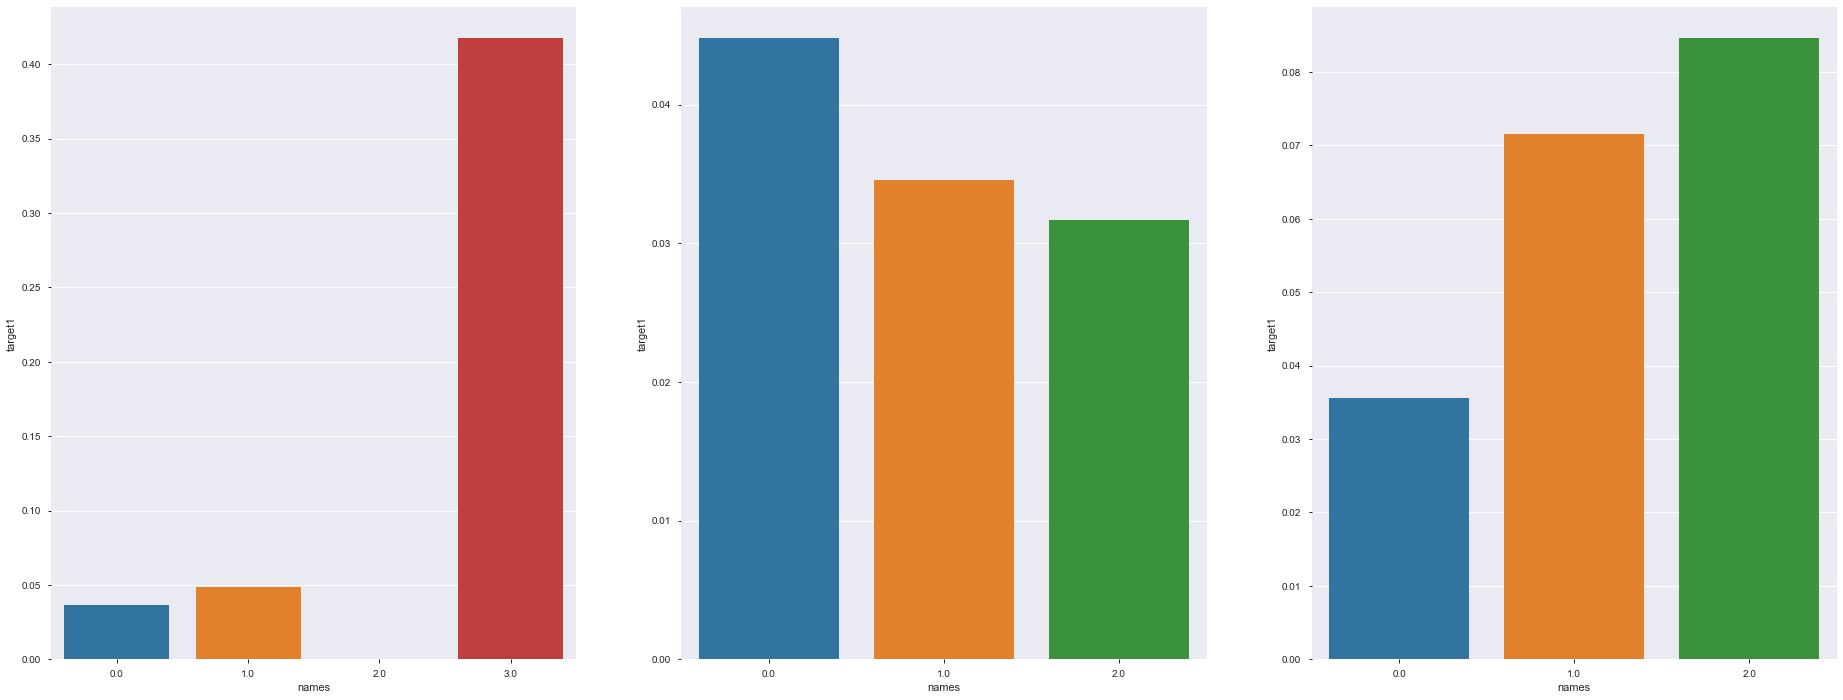

In [66]:
k = 0
plt.figure(figsize = (32, 12))
temp0 = train_clean[train_clean.target == 0]
temp1 = train_clean[train_clean.target == 1]
for col in ['missing_total_0', 'missing_total_1', 'missing_total_2']:
    k += 1
    names = []
    one_list = []
    for fea in train_clean[col].unique():
        names.append(fea)
        temp0_fea = len(temp0[temp0[col] == fea])
        temp1_fea = len(temp1[temp1[col] == fea])
        one_list.append(temp1_fea / (temp0_fea + temp1_fea))
    plt.subplot(1, 3, k)
    plt.ylabel('counts')
    data = pd.DataFrame({'names': names, 'target1': one_list})
    sns.barplot(x = 'names', y = 'target1', data = data)

In [67]:
test_clean['missing_total_0'] = np.zeros(len(test_clean))
test_clean['missing_total_1'] = np.zeros(len(test_clean))
test_clean['missing_total_2'] = np.zeros(len(test_clean))

test_clean.loc[test_clean['ps_ind_04_cat'] == -1, 'missing_total_0'] += 1
test_clean.loc[test_clean['ps_car_01_cat'] == -1, 'missing_total_0'] += 1
test_clean.loc[test_clean['ps_ind_02_cat'] == -1, 'missing_total_0'] += 1

test_clean.loc[test_clean['ps_car_03_cat'] == -1, 'missing_total_1'] += 1
test_clean.loc[test_clean['ps_car_05_cat'] == -1, 'missing_total_1'] += 1

test_clean.loc[test_clean['ps_ind_05_cat'] == -1, 'missing_total_2'] += 1
test_clean.loc[test_clean['ps_car_07_cat'] == -1, 'missing_total_2'] += 1

### 二分类特征构建

In [68]:
train_clean['bin_plus_0'] = train_clean['ps_ind_06_bin'] + train_clean['ps_ind_07_bin'] + train_clean['ps_ind_08_bin'] + train_clean['ps_ind_09_bin']
train_clean['bin_plus_1'] = train_clean['ps_ind_16_bin'] + train_clean['ps_ind_17_bin'] + train_clean['ps_ind_18_bin']
train_clean['bin_plus_0'].value_counts()
##必然有一个特征无效，此时需要选择一个特征从train_clean和test_clean数据集中剔除

1    595212
Name: bin_plus_0, dtype: int64

In [69]:
train_clean['bin_plus_1'].value_counts()

1    556732
0     38480
Name: bin_plus_1, dtype: int64

In [70]:
train_clean['bin_plus_0'] = train_clean['ps_ind_06_bin'] + train_clean['ps_ind_07_bin'] + train['ps_ind_08_bin']
train_clean['bin_plus_0'].value_counts()

1    484917
0    110295
Name: bin_plus_0, dtype: int64

In [71]:
train_clean.drop('ps_ind_09_bin', axis = 1)
test_clean.drop('ps_ind_09_bin', axis = 1)

test_clean['bin_plus_0'] = test_clean['ps_ind_06_bin'] + test_clean['ps_ind_07_bin'] + test_clean['ps_ind_08_bin'] 
test_clean['bin_plus_1'] = test_clean['ps_ind_16_bin'] + test_clean['ps_ind_17_bin'] + test_clean['ps_ind_18_bin']

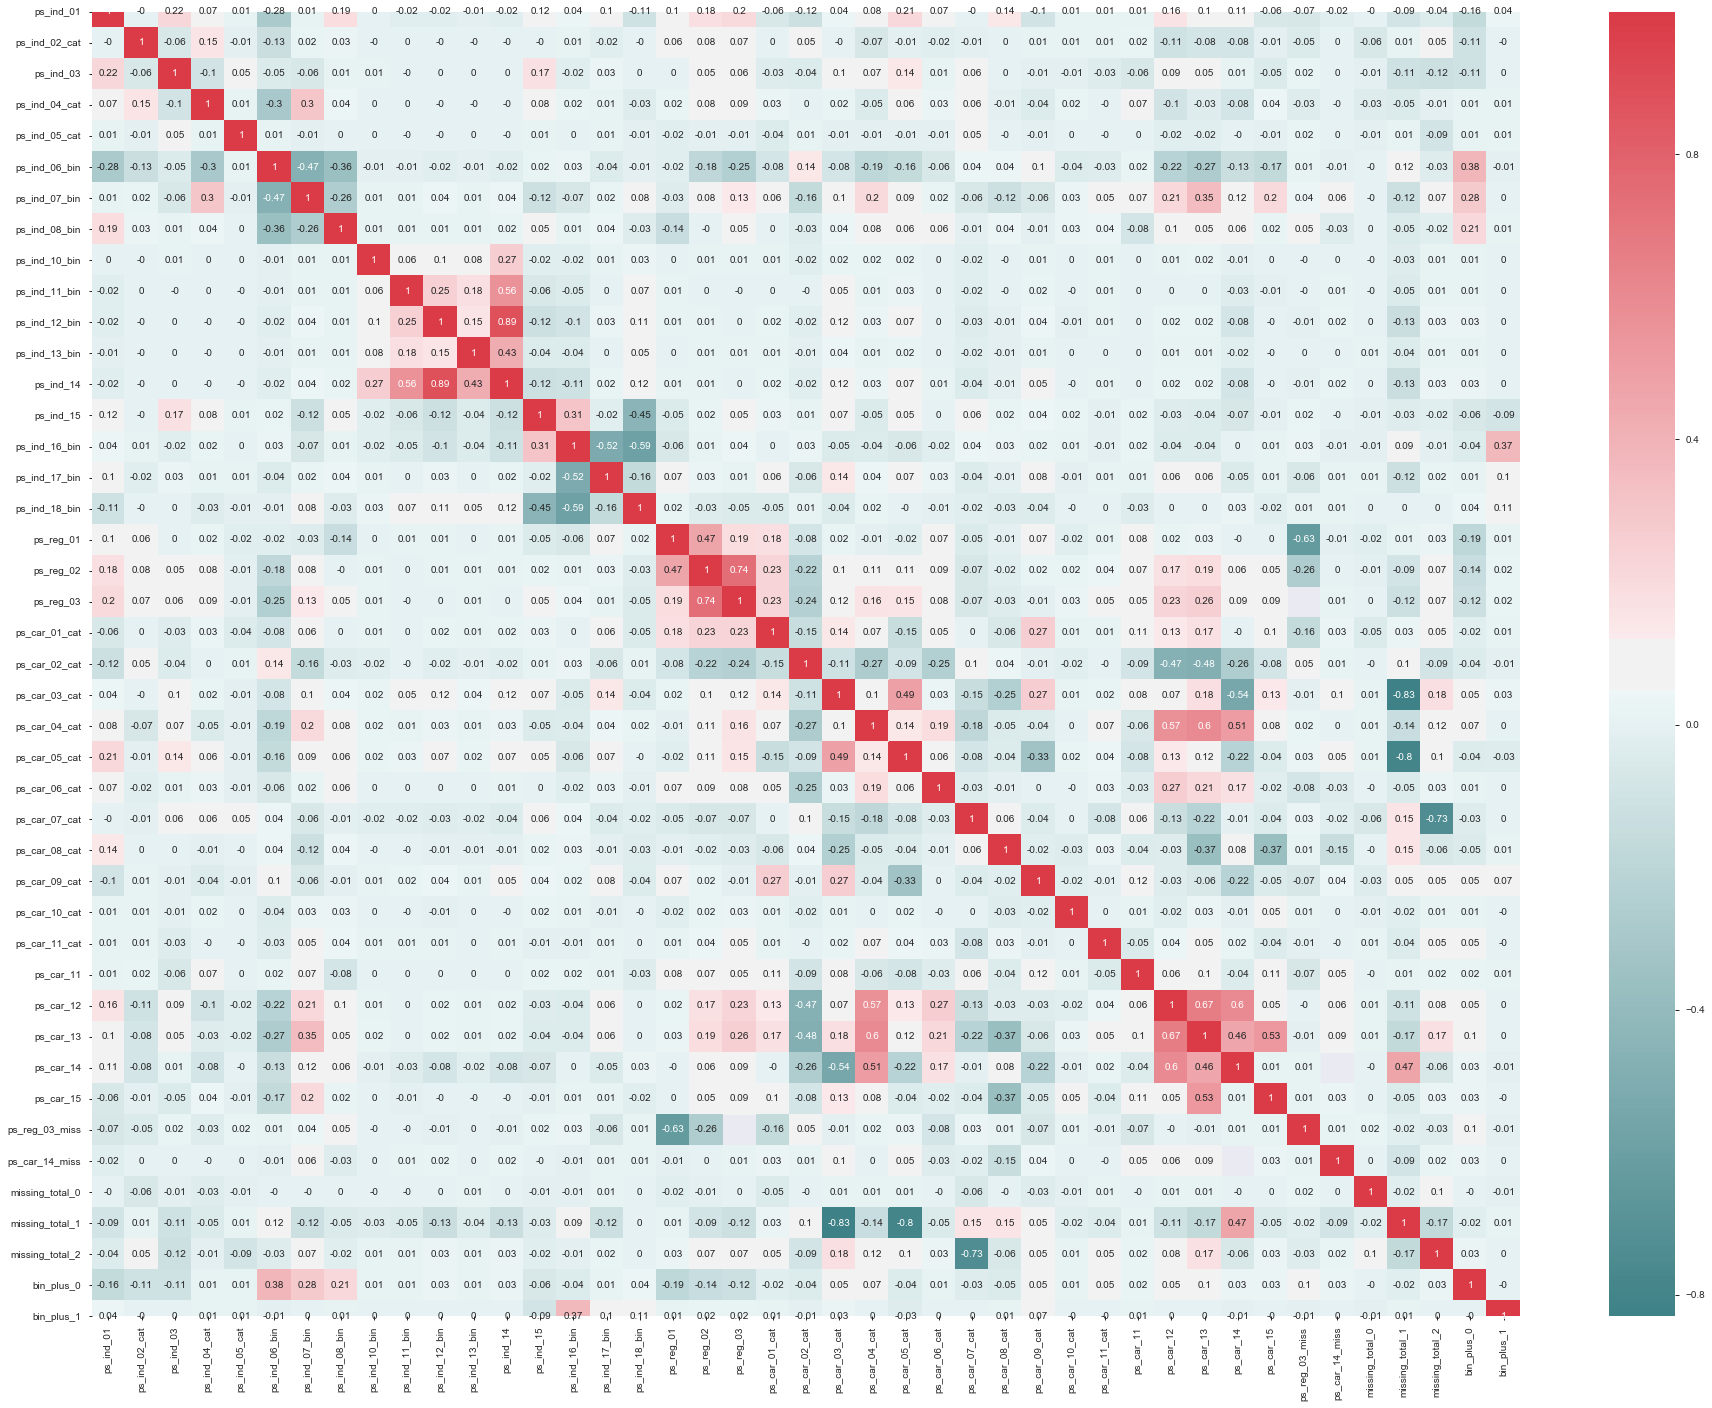

In [72]:
plt.figure(figsize = (32, 24))
sns.heatmap(train_clean[['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_reg_03_miss', 'ps_car_14_miss',
       'missing_total_0', 'missing_total_1', 'missing_total_2', 'bin_plus_0',
       'bin_plus_1']].corr().round(2), annot = True, 
            cmap = sns.diverging_palette(200, 10, as_cmap=True))

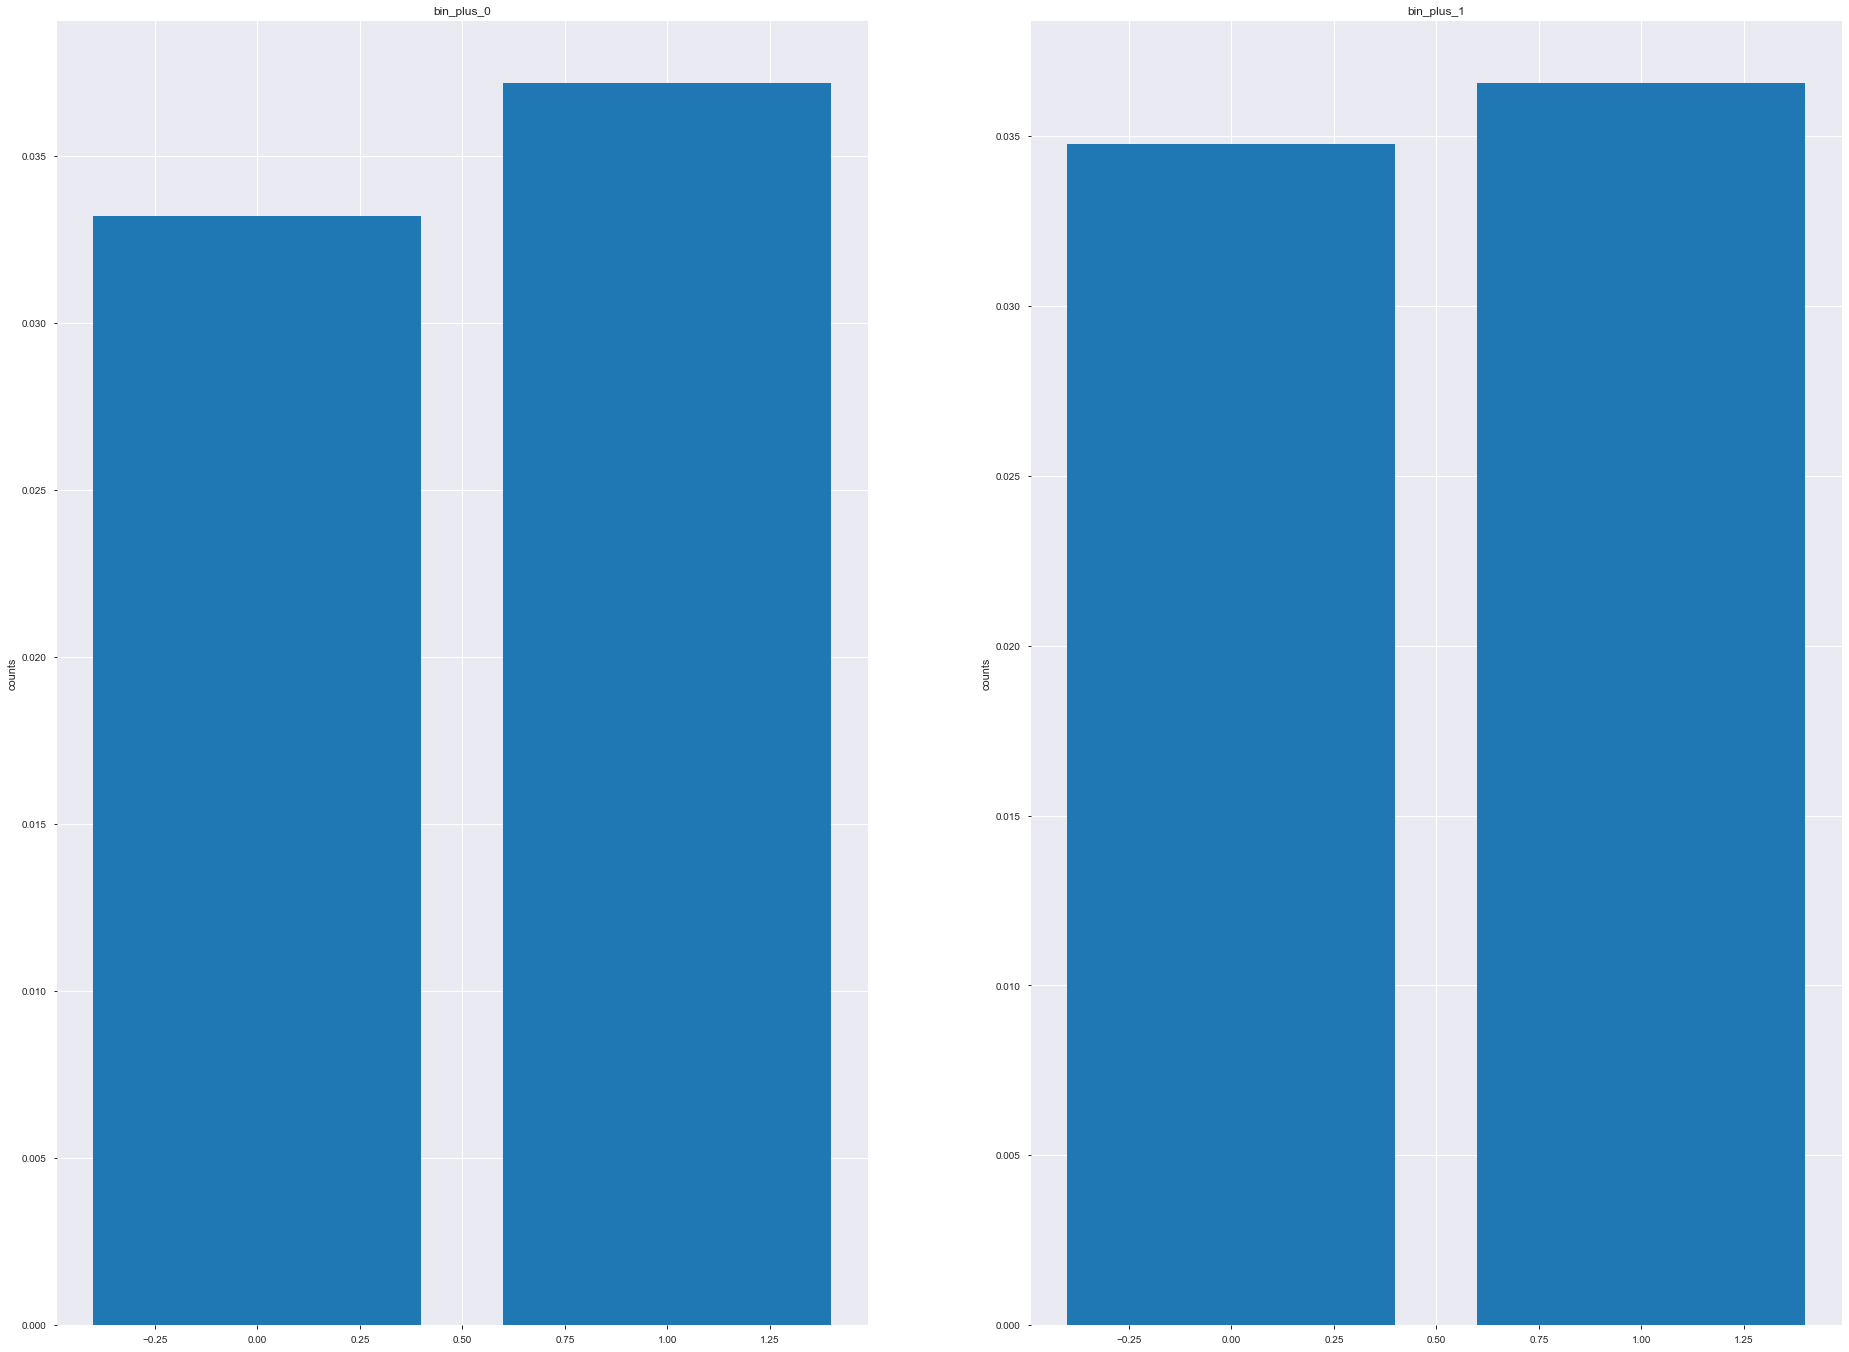

In [73]:
k = 0
temp0 = train_clean[train_clean['target'] == 0]
temp1 = train_clean[train_clean['target'] == 1]

plt.figure(figsize = (32, 24))
for col in ['bin_plus_0', 'bin_plus_1']:
    k += 1
    names = []
    one_list = []
    for fea in temp0[col].unique():
        names.append(fea)
        temp0_fea = len(temp0[temp0[col] == fea])
        temp1_fea = len(temp1[temp1[col] == fea])
        one_list.append(temp1_fea / (temp0_fea + temp1_fea))
    plt.subplot(1, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(names, one_list)

In [79]:
k = 0
temp0 = train_clean[train_clean['target'] == 0]
temp1 = train_clean[train_clean['target'] == 1]

plt.figure(figsize = (32, 24))
for col in ['bin_plus_0', 'bin_plus_1']:
    
    names = []
    one_list = []
    for fea in temp0[col].unique():
        names.append(fea)
        temp0_fea = len(temp0[temp0[col] == fea])
        temp1_fea = len(temp1[temp1[col] == fea])
        one_list.append(temp1_fea / (temp0_fea + temp1_fea))
    if k == 0:
        df = pd.DataFrame({ col: one_list}, index = names)
    else:
        df = pd.concat([df, pd.DataFrame({col: one_list}, index = names)], on = names, axis = 0)
    k += 1
df.iplot(kind = 'bar', subplots = True, shape = (1, 2))

TypeError: concat() got an unexpected keyword argument 'on'

<Figure size 2304x1728 with 0 Axes>

In [ ]:
df

### 多分类特征构建

In [ ]:
cat_cols.remove('ps_car_08_cat')
cat_cols.remove('ps_car_11_cat')

#### 将多分类特征留存一份副本，当成顺序或连续变量，用中值填充到空值

In [ ]:
for col in cat_cols:
    name = '%s_rank'%(col)
    train_clean[name] = train_clean[col].replace(-1, np.nan)
    train_clean[name] = train_clean[name].fillna(train_clean[name].median())
    test_clean[name] = test_clean[col].replace(-1, np.nan)
    test_clean[name] = test_clean[name].fillna(test_clean[name].median())

In [ ]:
#### 把所有原本的多分类特征，根据贝叶斯概率转化为连续型特征
'''
y = train_clean.target
y1 = train_clean[train_clean.target == 1]
for col in cat_cols:
    cat1 = train_clean[col]
    cat2 = train_clean.loc[y == 1, col]
    cat3 = test_clean[col]
    valuec1 = cat1.value_counts()
    valuec2 = cat2.value_counts()
    catdict = {}
    for i in valuec1.index:
        ni = valuec1[i]
        if i in valuec2.index:
            ni1 = valuec2[i]
        else:
            ni1 = 0
        lam = 1 / (np.exp(2 - 0.1 * ni))
        smoothing = lam * ni1 / ni + (1 - lam) * len(y1) / len(y)
        catdict[i] = smoothing
    print(catdict)
    list1 = []
    list2 = []
    for i in cat1:
        list1.append(catdict[i])
    for i in cat3:
        list2.append(catdict[i])
    train_clean[col] = list1
    test_clean[col] = list2
'''

In [ ]:
train_clean.drop(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 
                  'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
                  'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
                  'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 
                  'ps_calc_20_bin'], axis = 1)
test_clean.drop(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 
                  'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
                  'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
                  'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 
                  'ps_calc_20_bin'], axis = 1)

In [ ]:
import pickle
with open('values.pkl', 'wb') as f:
    pickle.dump(train_clean, f)
    pickle.dump(test_clean, f)

# 创建模型

## 载入数据

In [ ]:
import pickle
with open('values.pkl', 'rb') as f:
    train_clean = pickle.load(f)
    test_clean = pickle.load(f)

In [80]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
y = train_clean['target']
x = train_clean.drop(['id', 'target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 100)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference = lgb_train)

In [81]:
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 16,
    'num_iterations': 25,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
         }
gbm = lgb.train(params, lgb_train, num_boost_round = 100, valid_sets = lgb_train)
y_train_pred = gbm.predict(x_train, pred_leaf = True)

E:\ProgramData\Anaconda3\envs\py36\lib\site-packages\lightgbm\engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[1]	training's binary_logloss: 0.156162
[2]	training's binary_logloss: 0.156103
[3]	training's binary_logloss: 0.156045
[4]	training's binary_logloss: 0.155989
[5]	training's binary_logloss: 0.155934
[6]	training's binary_logloss: 0.155876
[7]	training's binary_logloss: 0.15582
[8]	training's binary_logloss: 0.155767
[9]	training's binary_logloss: 0.155714
[10]	training's binary_logloss: 0.155662
[11]	training's binary_logloss: 0.15561
[12]	training's binary_logloss: 0.155564
[13]	training's binary_logloss: 0.155515
[14]	training's binary_logloss: 0.155467
[15]	training's binary_logloss: 0.15542
[16]	training's binary_logloss: 0.155372
[17]	training's binary_logloss: 0.155324
[18]	training's binary_logloss: 0.15528
[19]	training's binary_logloss: 0.155238
[20]	training's binary_logloss: 0.155193
[21]	training's binary_logloss: 0.155152
[22]	training's binary_logloss: 0.15511
[23]	training's binary_logloss: 0.155068
[24]	training's binary_logloss: 0.155028
[25]	training's binary_logloss

In [82]:
transformed_training_matrix = np.zeros([len(y_train_pred),
                                        len(y_train_pred[0]) * params['num_leaves']], 
                                       dtype = np.int64)
for i in range(0, len(y_train_pred)):
    temp = np.arange(len(y_train_pred[0])) * params['num_leaves'] + np.array(y_train_pred[i])
    transformed_training_matrix[i][temp] += 1

In [83]:
y_test_pred = gbm.predict(x_test, pred_leaf = True)
transformed_testing_matrix = np.zeros([len(y_test_pred),
                                        len(y_test_pred[0]) * params['num_leaves']], 
                                       dtype = np.int64)
for i in range(0, len(y_test_pred)):
    temp = np.arange(len(y_test_pred[0])) * params['num_leaves'] + np.array(y_test_pred[i])
    transformed_testing_matrix[i][temp] += 1

In [84]:

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty = 'l2', C = 0.05)
lm.fit(X = transformed_training_matrix, y = y_train)
y_pred_test = lm.predict_proba(transformed_testing_matrix)

E:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [85]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_test)

0.15411123534862636